# Базовая модель

## Описание модели

В модели присутствуют два вида агентов – **n** продавцов и **m** покупателей. В модели рассматривается только один вид товара, все продавцы хотят его продать, все покупатели его купить.

## Продавцы

У каждого продавца **s** определено минимальное значение цены **s.min_price**, за которую он готов продать товар. Ниже этой цены продавцу невыгодно продавать товар. У разных продавцов значение **s.min_price** может быть разным. У каждого продавца значение **s.min_price** определяется в начале процесса моделирование как случайное число, равномерно распределенное на отрезке **[saller_min, saller_max]**. Величины **saller_min** и **saller_max** одинаковы для всех продавцов и являются параметрами модели.

Также у каждого продавца **s** есть значение ожидаемой цены продажи **s.expect_price**, которая всегда больше или равна, чем **s.min_price**. Изначально **s.expect_price** равно **saller_max**, но в дальнейшем может уменьшаться или увеличиваться на величину **saller_delta**, одинаковую для всех продавцов и являющейся параметром модели. Изменение **s.expect_price** происходит после взаимодействия данного продавца **s** с покупателем. Правила данного изменения будут описаны ниже.


## Покупатели

У каждого покупателя **с** определено максимальное значение цены **c.max_price**, за которую он готов купить товар. Выше этой цены покупателю невыгодно покупать товар. У разных покупателей значение **c.max_price** может быть разным. У каждого покупателя значение **c.min_price** определяется в начале процесса моделирования как случайное число, равномерно распределенное на отрезке **[consumer_min ,consumer_max]**. Величины **consumer_min** и **consumer_max** одинаковы для всех продавцов и являются параметрами модели.
Также у каждого покупателя есть значение ожидаемой цены продажи **c.expect_price**, которая всегда меньше или равна, чем **c.max_price**. Изначально **c.expect_price** равно **0**, но в дальнейшем может уменьшаться или увеличиваться на величину **consumer_delta**, одинаковую для всех покупателей и являющейся параметром модели. Изменение **c.expect_price** происходит после взаимодействия данного покупателя c продавцом. Правила данного изменения будут описаны ниже.


## Взаимодействие

На каждом шаге моделирования случайным равновероятным образом выбирается один продавец **s** и один покупатель **c**. Между ними происходит попытка заключения сделки.

Если **s.expect_price** меньше или равно **c.expect_price** покупателя, то:
1. сделка происходит,
2. **s.expect_price** увеличивается на **s.delta**,
3. **c.expect_price** уменьшается на **c.delta**.
Такое поведение объясняется тем, что текущие ожидания от сделки удовлетворяют ожиданиям как продавца, так и покупателя. Реальная стоимость купли-продажи может быть определена как **(s.expect_price + c.expect_price) / 2**, однако в данной модели эта величина никак не учитывается.

При этом продавец считает, что если он сейчас продал товар за стоимость как минимум **s.expect_price**, то в дальнейшем он может его продать немного дороже и **s.expect_price** можно немного увеличить.

А покупатель считает, что он купил сейчас товар за стоимость не более **c.expect_price**, то в дальнейшем он может покупать товар немного дешевле и **c.expect_price** можно немного уменьшить.

Если **s.expect_price** больше, чем **c.expect_price** покупателя, то:
1. сделка не происходит,
2. **s.expect_price** уменьшается на **s.delta**,
3. **c.expect_price** увеличивается на **c.delta**.
Такое поведение объясняется тем, что текущие ожидания от сделки не удовлетворяют ожиданиям как продавца, так и покупателя.

При этом продавец считает, что если он сейчас не продал товар за стоимость **s.expect_price**, то для продажи в следующий раз **s.expect_price** надо немного уменьшить.

А покупатель считает, что если он сейчас не смог купить товар за **c.expect_price**, то для покупки в следующий раз **c.expect_price** надо немного увеличить.


## Анализ


Модель на каждом такте должна учитывать:
1. Среднее значение **s.expect_price** по всем продавцам,
2. Минимальное значение **s.expect_price** по всем продавцам,
3. Среднее значение **с.expect_price** по всем покупателям,
4. Максимальное значение **с.expect_price** по всем покупателям,
5. Долю состоявшихся сделок на данный момент.

## Параметры модели


* **n** - количество продавцов,
* **m** - количество покупателей,
* **[saller_min, saller_max]** – интервал, из которого определяется **s.min_price** для каждого продавца,
* **saller_delta** - величина изменения ожидаемой цены у покупателя,
* **[consumer_min ,consumer_max]** – интервал, из которого определяется **с.max_price** для каждого покупателя,
* **consumer_delta** - величина изменения ожидаемой цены у продавца.


## Технические требования


* Модель должна быть построена в объектно-ориентированном подходе. Каждый вид агента описывается определенным классом, а каждый агент, соответственно, является объектом данного класса.
* Модель также является классом, в конструктор которого передаются все параметры модели.
* Модель должна иметь метод **run(n)**, который моделирует **n** последующих шагов модели

## Построение графиков

* Модель должна иметь метод **plot_dynamics(i,j)**, который строит графики анализа поведения моделей на интервале шагов с **i** по **j**.
* Модель должна иметь метод **plot_supply_and_demand(i)**, который строит графики спроса и предложения в момент времени **i**.

## Построение графа (схемы)


Модель должна иметь метод **plot_graph(i, j)**, который строит и визуализирует граф, в котором вершинами являются продавцы и покупатели, а ребра обозначают количество совершенных или не совершенных между ними сделок в периоде с **i** по **j**. Покупатели обозначены синим цветом, продавцы обозначены пурпурным. Зеленые ребра обозначают удачные сделки между продавцом и покупателем. Красные ребра обозначают неудачные сделки. Толщина ребра показывает количество сделок между данными продавцом и покупателем относительно общего количества сделок.

# Реализация базовой модели

## Подключение библиотек

In [ ]:
import random
import matplotlib.pyplot as plt
from tqdm import trange # Модуль для визуализации прогресс-бара при запуске модели
import graphviz # Модуль для визуализации графов

## Реализация базовой модели

In [ ]:
def mean(lst):
    return sum(lst)/len(lst)


class Model:
    def __init__(self, num_of_consumers, num_of_sellers, consumer_min, consumer_max, consumer_delta, seller_min, seller_max, seller_delta):
        '''
            Конструктор класса.

            num_of_consumers -- количество покупателей
            num_of_sellers -- количество продавцов
            consumer_min -- минимальное возможное значение max_price для покупателей
            consumer_max -- максимально возможное значение max_price для покупателей
            consumer_delta -- шаг изменения expect_price для покупателей
            seller_min -- минимальное возможное значение min_price для продавцов
            seller_max -- максимально возможное значение min_price для продавцов
            seller_delta -- шаг изменения expect_price для продавцов

        '''
        self.num_of_consumers = num_of_consumers
        self.num_of_sellers = num_of_sellers

        # Список всех продавцов модели
        self.consumers = [Consumer(consumer_min, consumer_max, consumer_delta) for _ in range(num_of_consumers)]

        # Список всех покупателей модели
        self.sellers = [Seller(seller_min, seller_max, seller_delta) for _ in range(num_of_sellers)]

        # Список списков. На позиции i находится список текущих значений expect_price для всех покупателей на шаге i.
        self.consumers_expect_price = []

        # Список списков. На позиции i находится список текущих значений expect_price для всех продавцов на шаге i.
        self.sellers_expect_price = []

        # Список результатов сделок. На позиции i находится словарь вида
        # {
        #     'consumer_id' : consumer_id,
        #     'seller_id' : seller_id
        #     'result' : result
        # }
        # где result = 1, если на i шаге была успешная сделка, иначе 0.
        self.deals_results = []


    def deal(self, consumer_id, seller_id):
        '''
            Моделирование сделки между покупателем с индексом consumer_id и продавцом с индексом seller_id

            consumer_id -- индекс покупателя в массиве self.consumers
            seller_id -- индекс продавца в массиве self.sellers
        '''

        # Сохраняем текущие значения expect_price покупателей
        self.consumers_expect_price.append([consumer.expect_price for consumer in self.consumers])

        # Сохраняем текущие значения expect_price продавцов
        self.sellers_expect_price.append([seller.expect_price for seller in self.sellers])

        if self.sellers[seller_id].expect_price <= self.consumers[consumer_id].expect_price:
            # Сделка состоялась

            # Записываем факт состоявшейся сделки
            self.deals_results.append({
                'consumer_id' : consumer_id,
                'seller_id' : seller_id,
                'result' : 1
                })

            # Данный покупатель решает уменьшить у себя expect_price
            self.consumers[consumer_id].decrease_expect_price()

            # Данный продавец решает увеличить у себя expect_price
            self.sellers[seller_id].increase_expect_price()

        else:
            # Сделка не состоялась

            # Записываем факт несостоявшейся сделки
            self.deals_results.append({
                'consumer_id' : consumer_id,
                'seller_id' : seller_id,
                'result' : 0
                })

            # Данный покупатель решает увеличить у себя expect_price
            self.sellers[seller_id].decrease_expect_price()

            # Данный продавец решает уменьшить у себя expect_price
            self.consumers[consumer_id].increase_expect_price()


    def run(self, num_of_steps):
        '''
            Запуск num_of_steps шагов модели
        '''
        for _ in trange(num_of_steps+1): # trange вместо range для визуализации прогресс-бара

            # Выбираем индекс покупателя случайным образом
            consumer_id = random.randrange(0, self.num_of_consumers)

            # Выбираем индекс продавца случайным образом
            seller_id = random.randrange(0, self.num_of_sellers)

            # Моделируем сделку
            self.deal(consumer_id, seller_id)


    def plot_dynamics(self, start, end):
        '''
            Визуализация динамики модели на шагах от start до end включительно
        '''

        # Формируем два графика по горизонтали
        fig = plt.figure(figsize = (20,5))
        ax1 = fig.add_subplot(1,2,1)
        ax2 = fig.add_subplot(1,2,2)

        # Список точек по оси шагов
        steps_range = list(range(start, end+1))
        ax1.title.set_text("Динамика ожидаемых цен")

        # Среднее значение expect_price среди покупателей
        ax1.plot(steps_range, list(map(mean, self.consumers_expect_price[start : end+1])), color='g', label = "Средняя ожидаемая цена покупателей")

        # Максимальное значение expect_price среди покупателей
        ax1.plot(steps_range, list(map(max, self.consumers_expect_price[start : end+1])), color='g', linestyle='--', label = "Максимальная ожидаемая цена покупателей")

        # Среднее значение expect_price среди продавцов
        ax1.plot(steps_range, list(map(mean, self.sellers_expect_price[start : end+1])), color='r', label = "Средняя ожидаемая цена продавцов")

        # Минимальное значение expect_price среди продавцов
        ax1.plot(steps_range, list(map(min, self.sellers_expect_price[start : end+1])), color='r', linestyle='--', label = "Минимальная ожидаемая цена продавцов")
        ax1.legend()
        ax1.set_xlabel("Шаг")
        ax1.set_ylabel("У.Е.")


        # Находим долю успешных сделок на отрезке от start до end включительно
        deals_sum = [0]
        for i in range(start, end+1):
            deals_sum.append(deals_sum[-1] + self.deals_results[i]['result'])
        deals_fraction = [deals_sum[i] / i for i in range(1, end - start + 2)]
        ax2.title.set_text("Динамика доли сделок")
        ax2.plot(steps_range, deals_fraction, label="Доля сделок")
        ax2.legend()
        ax2.set_xlabel("Шаг")
        ax2.set_ylabel("Доля")

    def plot_supply_and_demand(self, pos_list):
        '''
            Визуализация спроса и предложения в моменты времени, указанные в списке pos_list
        '''

        # Формируем фигуру, состоящую из len(pos) графиков, расположенных горизонтально
        fig, axs = plt.subplots(1, len(pos_list), figsize = (5 * len(pos_list), 5))


        for i in range(len(pos_list)):
            # Для каждого значения из pos рисуем свой график
            axs[i].title.set_text(f"Спрос и предложение в момент {pos_list[i]}")

            # Все значения expect_price для покупателей в момент времени pos[i] сортируем по убыванию.
            # Этот график описывает функцию спроса, т.е. при заданном значении цены мы видим, какое количество покупателей готовы купить товар за данную цену или дороже
            axs[i].plot(list(range(1, self.num_of_consumers+1)), sorted(self.consumers_expect_price[pos_list[i]], reverse=True), color='g', label="Спрос")

            # Все значения expect_price для продавцов в момент времени pos[i] сортируем по возрастанию.
            # Этот график описывает функцию предложения, т.е. при заданном значении цены мы видим, какое количество продавцов готовы продать товар за данную цену или дешевле
            axs[i].plot(list(range(1, self.num_of_sellers+1)), sorted(self.sellers_expect_price[pos_list[i]]), color='r', label="Предложение")

            axs[i].legend()
            axs[i].set_xlabel("Количество")
            axs[i].set_ylabel("У.Е.")

    def plot_graph(self, start, end):
        '''
            Построение и визуализация графа удачных и неудачных сделок
            на отрезке времени от start до end.
        '''
        # Словарь для построения графа сделок.
        # Ключ -- пара (consumer_id, seller_id)
        # Значение -- словарь с ключами 'positive_count' и 'negative_count',
        # в которых будут подсчитано количество удачных и неудачных сделок
        # между consumer_id и seller_id в интервале от start до end
        g_deals = {}

        # Создание всех ключей в g_deals и инициирование нулевыми значениями
        for consumer_id in range(self.num_of_consumers):
            for seller_id in range(self.num_of_sellers):
                g_deals[(consumer_id, seller_id)] = {
                    'positive_count' : 0,
                    'negative_count' : 0,
                }

        # Для всех моментов времени от start до end
        for i in range(start, end+1):


            if self.deals_results[i]['result'] == 0: #Если сделка неудачная
                # то увеличиваем счетчик неудачных сделок для данной пары consumer_id и seller_id
                g_deals[self.deals_results[i]['consumer_id'], self.deals_results[i]['seller_id']]['negative_count'] += 1
            else:
                g_deals[self.deals_results[i]['consumer_id'], self.deals_results[i]['seller_id']]['positive_count'] += 1

        max_value = 0
        for edge, value in g_deals.items():
            max_value = max(max_value, value['negative_count'], value['positive_count'])

        graph = graphviz.Graph()
        for consumer_id in range(self.num_of_consumers):
            graph.node(f"С {consumer_id}", label=str(consumer_id), style='filled', fillcolor='blue')

        for seller_id in range(self.num_of_sellers):
            graph.node(f"S {seller_id}", label=str(seller_id), style='filled', fillcolor='magenta', shape='box')

        def get_penwidth(x):
            return str(10*x // max_value)

        for edge, value in g_deals.items():
            graph.edge(f"С {edge[0]}", f"S {edge[1]}", penwidth = get_penwidth(value['negative_count']), color="red")
            graph.edge(f"С {edge[0]}", f"S {edge[1]}", penwidth =  get_penwidth(value['positive_count']), color="green")

        graph.attr(layout="circo")
        return graph


class Consumer:
    def __init__(self, consumer_min, consumer_max, consumer_delta):
        self.max_price = consumer_min + random.random()*(consumer_max - consumer_min)
        self.expect_price = 0
        self.delta = consumer_delta

    def increase_expect_price(self):
        if self.expect_price + self.delta <= self.max_price:
            self.expect_price += self.delta

    def decrease_expect_price(self):
        self.expect_price -= self.delta


class Seller:
    def __init__(self, seller_min, seller_max, seller_delta):
        self.min_price = seller_min + random.random()*(seller_max - seller_min)
        self.expect_price = seller_max
        self.delta = seller_delta

    def increase_expect_price(self):
        self.expect_price += self.delta

    def decrease_expect_price(self):
        if self.expect_price - self.delta >= self.min_price:
            self.expect_price -= self.delta



## Запуск модели

In [ ]:
random.seed(42)
model = Model(num_of_consumers=3,
              num_of_sellers=3,
              consumer_min=3,
              consumer_max=4,
              consumer_delta=0.1,
              seller_min=0,
              seller_max=1,
              seller_delta=0.1)
model.run(1000)

100%|██████████| 1001/1001 [00:00<00:00, 117260.11it/s]


## Визуализация модели

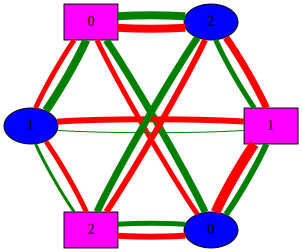

In [ ]:
model.plot_graph(14, 200)

## Результаты моделирования

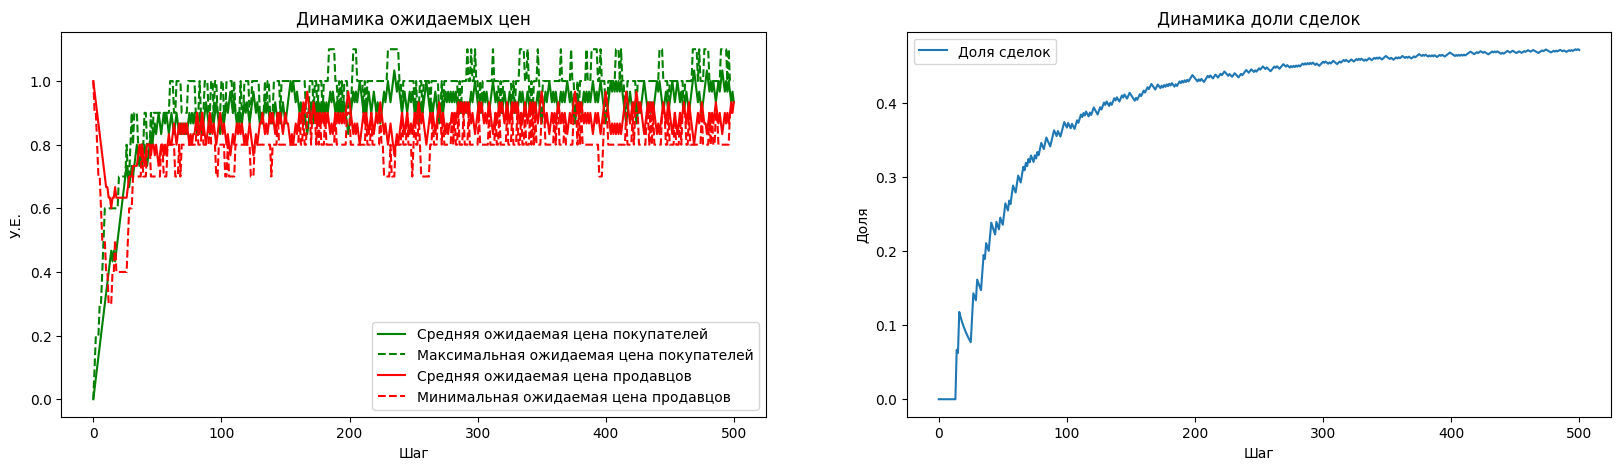

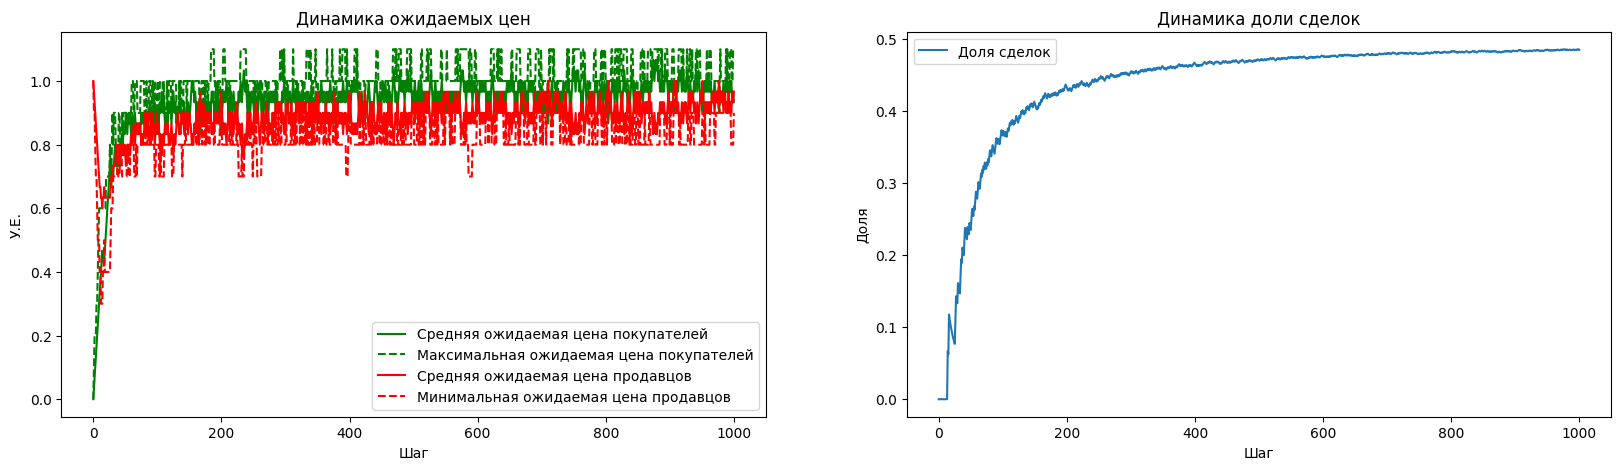

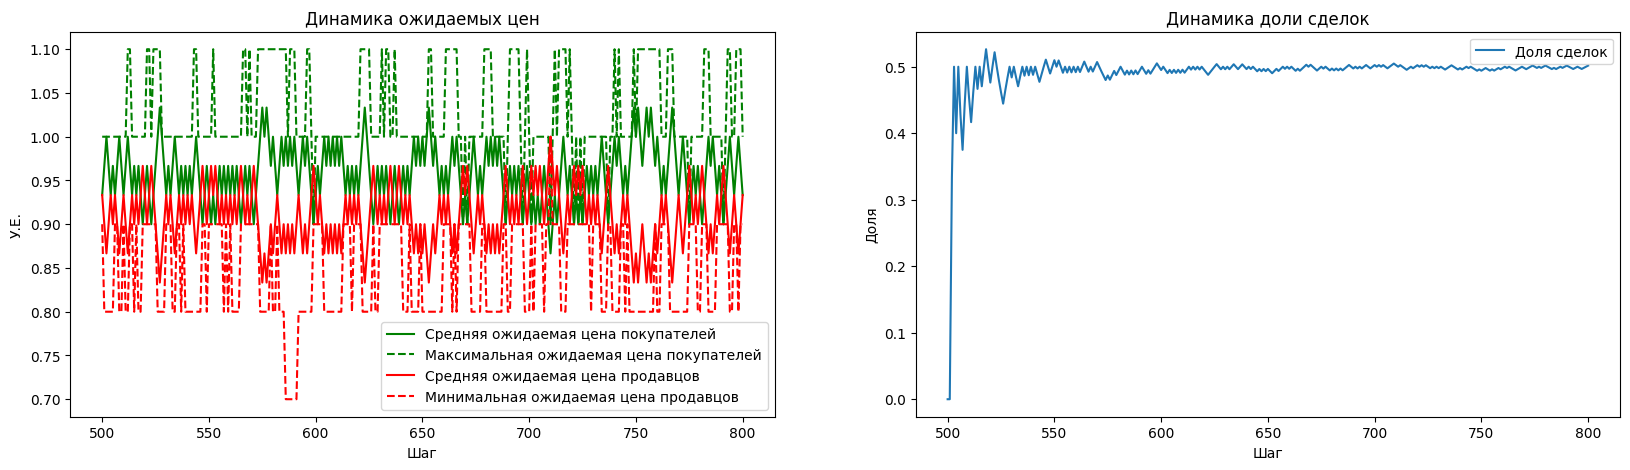

In [ ]:
model.plot_dynamics(0, 500)
model.plot_dynamics(0, 1000)
model.plot_dynamics(500, 800)

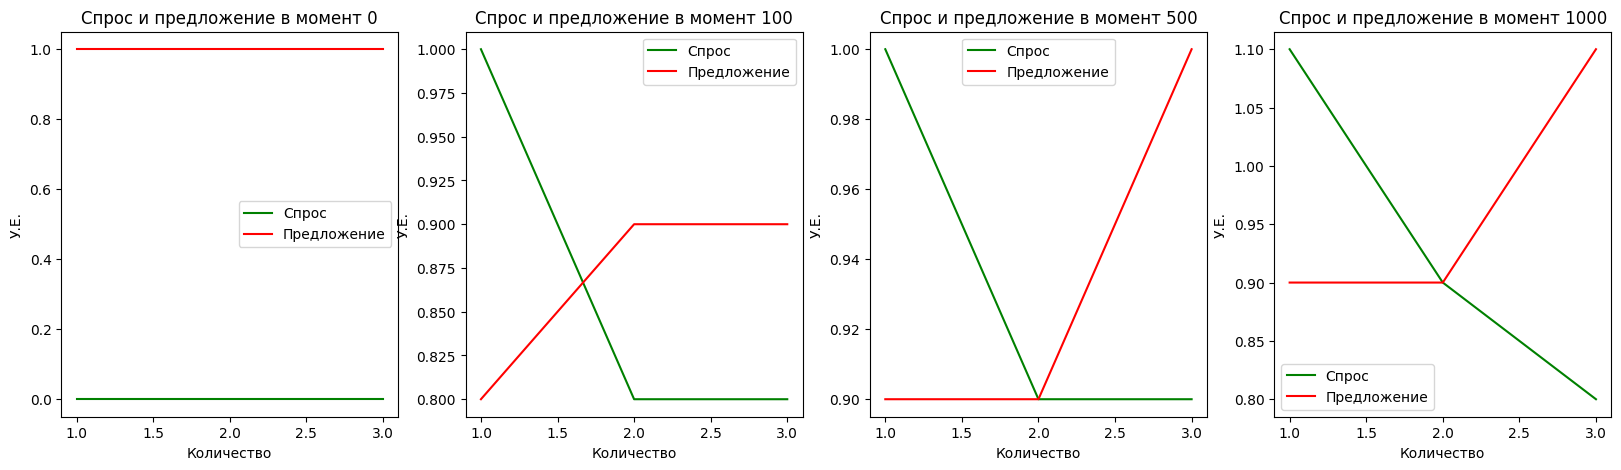

In [ ]:
model.plot_supply_and_demand([0, 100, 500, 1000])

# Задания

При выполнения всех заданий Вам необходимо писать текст (в Markdown ячейках), вызывать существующие фрагменты кода и писать собственный код. При реализации кода придерживайтесь объектно-ориентированного подхода. Обращаем Ваше внимание, что в данных заданиях будет в первую очередь будет оцениваться Ваши интерпретации и выводы относительно свойств и поведения моделей.   

## Задание 1 (1 балл)

Запустите базовую модель с разными параметрами. Проанализируйте, как меняется поведение модели в зависимости от изменения параметров. Опишите эти изменения.

Проинтерпретируйте (дайте объяснение) результаты работы базовой модели. В частности, обратите внимание на следующие аспекты:
* Ожидаемые цены попадают в некоторый интервал.
* Доля сделок выходит на некоторый постоянный уровень.
* Скорости сходимости зависят от количества продавцов и покупателей и шага цены.
* Опишите характеристики изменений диаграмм связей со временем.

Удобнее будет разделить графики на три фазы по оси ОХ , т. е. количество сделок(шагов модели)(будут определяться по графику "Динамика доли сделок"): (1)- нулевой показатель доли сделок, (2)-интенсивный рост доли сделок,(3)-выход на постоянный уровень. Если брать параметры, которые изначально приводятся в примере, то это: (1) - интервал [0;13] по оси ОХ, (2) - [14;200] по оси ОХ, (3) -[200;1000] по оси ОХ.


Для начала проанализируем результаты модели, представленные в графике "Динамика ожидаемых цен", в котором изображена визуализация динамики модели на шагах от start до end включительно (start и end-параметры). Мы видим, что если рассматривать шаги на интервале (1), то мы можем наблюдать интенсивный рост средней ожидаемой цены покупателей, потом данный рост прекращается и переходит в флуктуации(чередующие импульсы) вокруг определенной ассимтоты, что показывает выход ожидаемой цены в некоторый интервал. Если же анализировать изменения средней ожидаемой цены продавцов, то заметен, наоборот, резкий спад на интервале (1), а в дальнейшем так же как и покупателей резкие изменения прекращаются и переходят в колебания в определенном ограниченном интервале по оси ОУ. Поведение максимальной ожидаемой цены покупателей и минимальной ожидаемой цены продавцов схоже на изменения средних показателей. Поэтому дальнейшие умозаключения можно делать для ожидаемых цен для покупателей и продавцов, не ограничивая общности.


Далее проанализируем результаты модели, представленные в графике "Динамика доли сделок". На интервале (1) доля сделок равняется нулю, в дальнейшем переходит в возрастающий график и на (3) интервале переходит на постоянный уровень.
Нам сразу видна определенная взаимосвязь между этими двуми графиками.  Интервал (1) характерезуется интесивным ростом ожидаемой цены покупателей и интенсивным спадом у продавцев, на этих шагах не происходит удачных сделок, так как ожидаемая цена покупателей ниже ожидаемой цена продавцов на всех шагах, что и продемострировано на графике "Динамика доли сделок". Далее на интервале (2) мы можем заметить, что в некоторых случаях ожидаемые цены покупателей и продавцов становятся равными и количество таких точек соприкосновения растет с увеличением количесва шагов, так как мы рассматриваем поведение агентов в дискретном времени, и увеличение количества шагов позволяет агентам корректировать цены, что приводит к росту удачных сделок. Опять же это можно заметить на графике "Динамика доли сделок". Последний интервал (3) показывет, что количесво соприкосновений двух кривых примерно одинаковое, что уже не дает рост доли сделок, а демонстрирует переход кривой на втором графике на стабильный уровень.


Изменение числа покупателей и продавцов влияет на скорость сходимости кривых в графике "Динамика ожидаемых цен", при увеличении числа покупателей и продавцов увеличивается и (1) интервал, где кривые не имеют общих точек и доля сделок нулевая. Также интервал (2) в этом случае тоже увеличивается. При уменьшении числа покупателей и продавцов интервалы (1) и (2) становятся меньше. Это может происходить по прричине того, что количество агентов на рынке влияет на то, насколько быстро агенты смогут найти равновесие и получить удачную сделку.

При увеличении шага изменения цены для продавцов и покупателей, интервал (1) уменьшается, то есть кривые быстрее сходятся, и удачные сделки начинаюся раньше. Это происходит, так как дельта изменения цен у покупателей и продавцов увеличивается, то есть они могут изменять цену эффективнее и быстрее. При уменьшении шага изменения цены для продавцов и покупателей все происходит наоборот.

Если мы будем рассматривать изменения связей в нашем графе со временем, мы опять же можем заметить связь с 3 фазами, которые мы описывали ранее (интервал (1) - фаза(1), интервал (2) - фаза(2),интервал (3) - фаза(3)). В фазе (1) ожидаемые цены покупателей и продавцов не касаюся, нет удачных сделок, следовательно все ребра красные. В фазе (2) количесво удачных сделок (зеленых ребер) значительно увеливается. Если брать временные промежутки на отрезке, ограниченном фазой (2), в процессе продвижения по этому отрезку мы видим ощутимый прирост зеленых ребер. В фазе же (3) мы не увидим значительных изменений в количестве зеленых ребер в процессе продвижения по отрезкам, ограниченным (3) фазой.




До этого был представлен общий случай, который будет схож с большинством. Теперь рассмотрим некоторые случаи, которые следует разобрать отдельно для более глубокого понимания работы модели. Рассмотрим случай, когда у нас не происходит равновесия. Например, это может произойти, когда минимум покупателя заметно выше максимума продавца.

In [ ]:
random.seed(42)
model = Model(num_of_consumers=5,
              num_of_sellers=5,
              consumer_min=3,
              consumer_max=4,
              consumer_delta=0.5,
              seller_min=10,
              seller_max=20,
              seller_delta=0.5)
model.run(1000)

100%|██████████| 1001/1001 [00:00<00:00, 104975.58it/s]


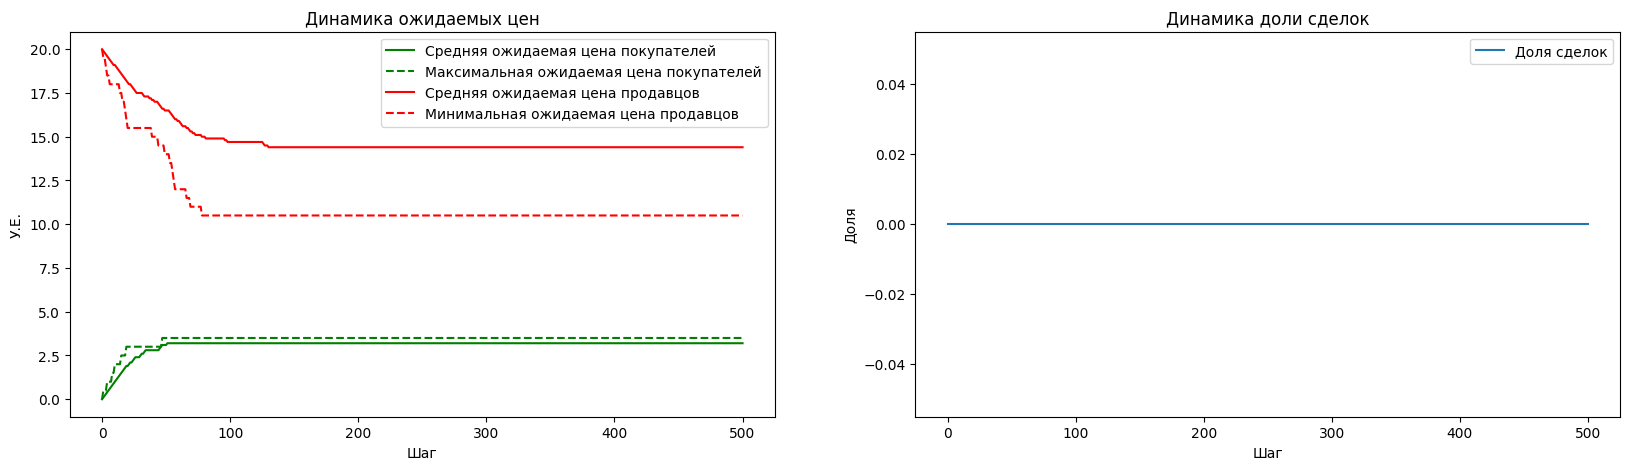

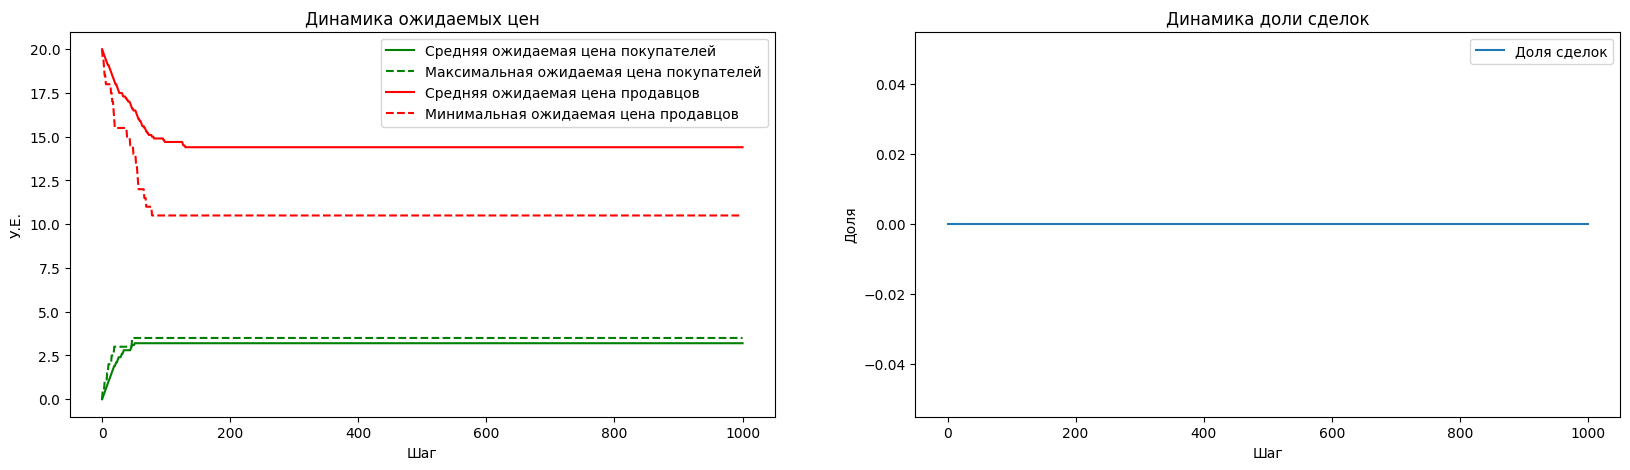

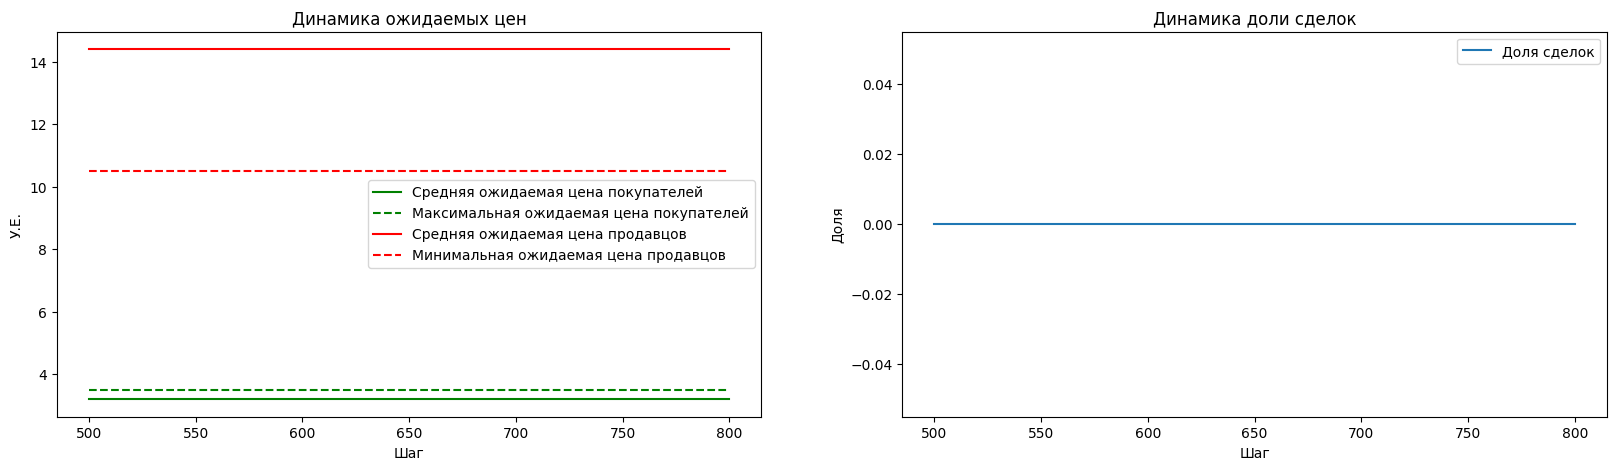

In [ ]:
model.plot_dynamics(0, 500)
model.plot_dynamics(0, 1000)
model.plot_dynamics(500, 800)

Также такая ситуация может произойти при очень маленькой дельте, что покупатели и продавцы не смогут сойтись

In [ ]:
random.seed(42)
model = Model(num_of_consumers=5,
              num_of_sellers=5,
              consumer_min=3,
              consumer_max=4,
              consumer_delta=0.01,
              seller_min=0,
              seller_max=10,
              seller_delta=0.01)
model.run(1000)

100%|██████████| 1001/1001 [00:00<00:00, 96572.70it/s]


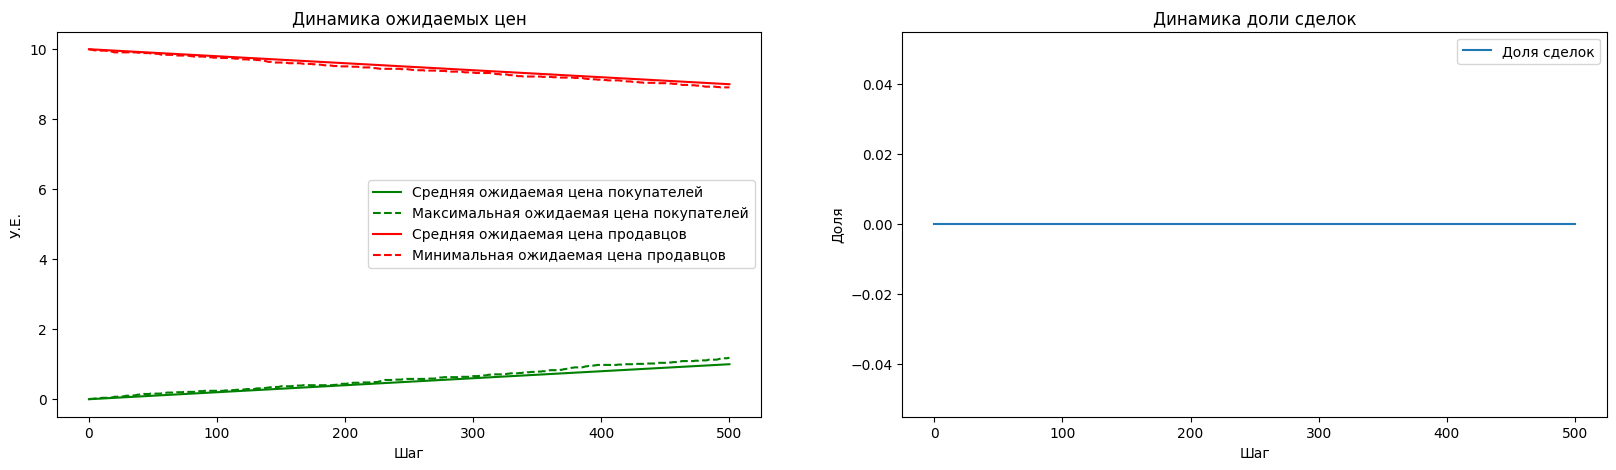

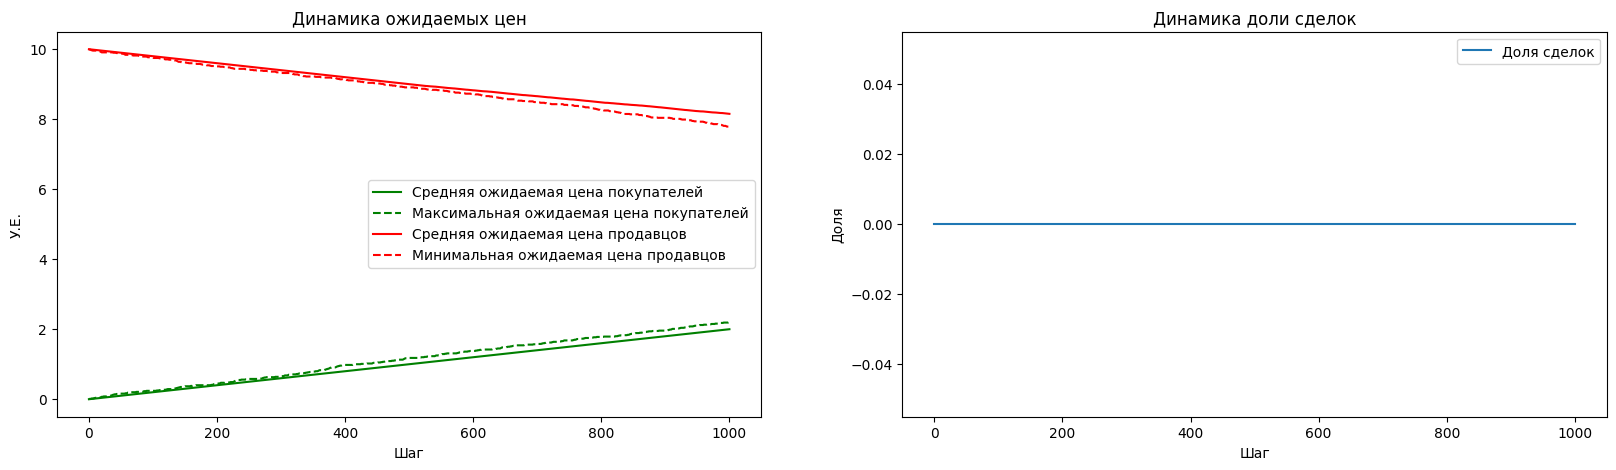

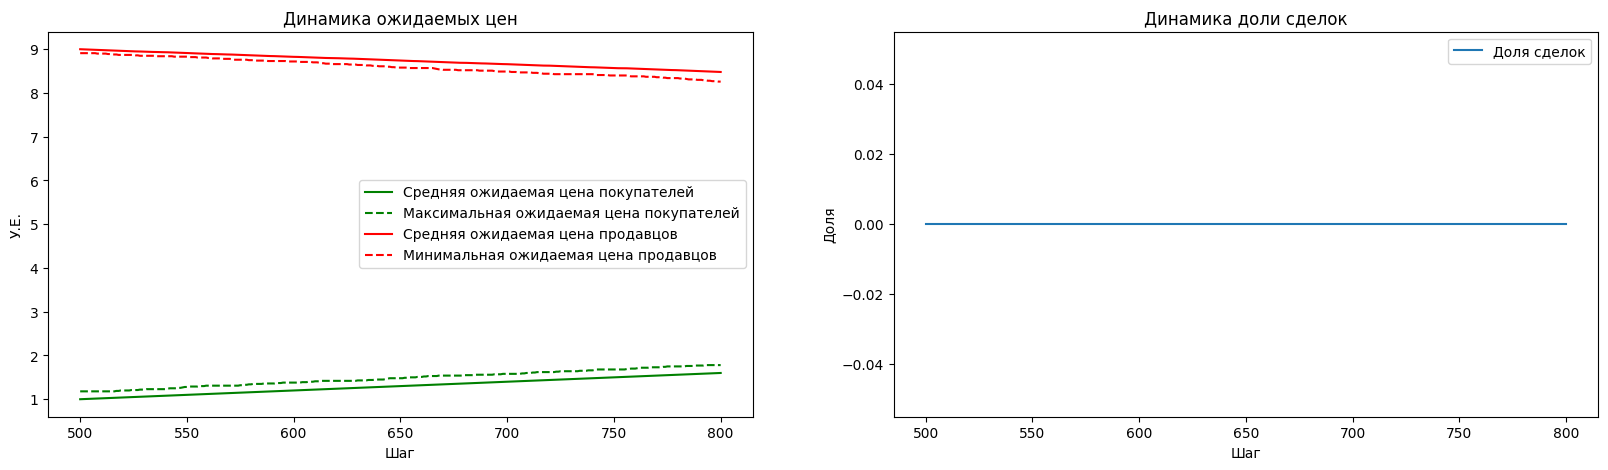

In [ ]:
model.plot_dynamics(0, 500)
model.plot_dynamics(0, 1000)
model.plot_dynamics(500, 800)

## Задание 2 (2 балла)


Модифицируйте базовую модель одним из указанных ниже вариантов.

<b><font color="red">!</font> Номер Вашего варианта указан в <a href="https://docs.google.com/spreadsheets/d/1jWBLQ1bJG2t2Ci38r1xFrKP06VjFn-IyKQO4PIEvXTA/edit#gid=0">таблице</a>.</b>

1. Разные вероятности выбора разных продавцов и покупателей.
2. Генерация разных групп покупателей и продавцов.
3. Разные переговорные позиции продавцов и покупателей (в том числе случайные).
4. Ожидания покупателей и продавцов меняются только в сторону средней цены предыдущего периода.
5. К граничным ценам продавцов и покупателей каждый период добавляется случайная величина.

* Продемонстрируйте и опишите работу модифицированной модели.
* Проинтерпретируйте результаты работы модели.

Вариант 4, назовем нашу модель 2

Наши агенты теперь ориентируются на состояние рынка в прошлом.


1.   Создадим массивы для хранения цен удачных сделок, по которым теперь будут ориентироваться агенты
2.   В функции deal изменим(по сравнению с базовой моделью) условия для изменения цен агентов, теперь они сравнивают свою цену со средней по всем ценам удачных сделок(если такие были)
3. После удачной сделки добавляем наши цены сделки в массив из пункта 1






In [ ]:
def mean(lst):
    return sum(lst)/len(lst)


class Model2:
    def __init__(self, num_of_consumers, num_of_sellers, consumer_min, consumer_max, consumer_delta, seller_min, seller_max, seller_delta):

        self.num_of_consumers = num_of_consumers
        self.num_of_sellers = num_of_sellers

        # Список всех продавцов модели
        self.consumers = [Consumer(consumer_min, consumer_max, consumer_delta) for _ in range(num_of_consumers)]

        # Список всех покупателей модели
        self.sellers = [Seller(seller_min, seller_max, seller_delta) for _ in range(num_of_sellers)]

        # Список списков. На позиции i находится список текущих значений expect_price для всех покупателей на шаге i.
        self.consumers_expect_price = []

        # Список списков. На позиции i находится список текущих значений expect_price для всех продавцов на шаге i.
        self.sellers_expect_price = []

        # Список результатов сделок. На позиции i находится словарь вида
        # {
        #     'consumer_id' : consumer_id,
        #     'seller_id' : seller_id
        #     'result' : result
        # }
        # где result = 1, если на i шаге была успешная сделка, иначе 0.
        self.deals_results = []

        # создаем список цен покупателей, по которым проходила удачная сделка(что-то по типу памяти цен сделок для покупателей), где на месте i будет цена покупателя в сделке i
        self.consumers_deal_price =[]
        # создаем список цен продавцов, по которым проходила удачная сделка(что-то по типу памяти цен сделок для продавцов), где на месте i будет цена продавца в сделке i
        self.sellers_deal_price =[]



    def deal(self, consumer_id, seller_id):


        # Сохраняем текущие значения expect_price покупателей
        self.consumers_expect_price.append([consumer.expect_price for consumer in self.consumers])

        # Сохраняем текущие значения expect_price продавцов
        self.sellers_expect_price.append([seller.expect_price for seller in self.sellers])

        if self.sellers[seller_id].expect_price <= self.consumers[consumer_id].expect_price:
            # Сделка состоялась

            # Записываем факт состоявшейся сделки
            self.deals_results.append({
                'consumer_id' : consumer_id,
                'seller_id' : seller_id,
                'result' : 1
                })
            # рассматриваем случай, когда это не первая сделка и средняя цена предыдущего периода ниже текущей, покупатель захочет понизить цену
            if  len(self.consumers_deal_price) >= 1 and mean(self.consumers_deal_price) < self.consumers[consumer_id].expect_price:
              self.consumers[consumer_id].decrease_expect_price()
            # рассматриваем случай, когда это первая сделка
            elif  len(self.consumers_deal_price) == 0:
              self.consumers[consumer_id].decrease_expect_price()

             # рассматриваем случай, когда это не первая сделка и средняя цена предыдущего периода выше текущей, продавец захочет повысить цену
            if  len(self.consumers_deal_price) >= 1 and mean(self.sellers_deal_price) >  self.sellers[seller_id].expect_price:
              self.sellers[seller_id].increase_expect_price()
               # рассматриваем случай, когда это первая сделка
            elif  len(self.consumers_deal_price) == 0:
              self.sellers[seller_id].increase_expect_price()

            #добавили цены, по которым прошла сделка
            # добавляем в список цены удачных сделок, имеет смысл добавлять только цены удачных так как по ним можно оценивать, состояние рынка
            self.consumers_deal_price.append(self.consumers[consumer_id].expect_price)
            self.sellers_deal_price.append(self.sellers[seller_id].expect_price)


        else:
            # Сделка не состоялась

            # Записываем факт несостоявшейся сделки
            self.deals_results.append({
                'consumer_id' : consumer_id,
                'seller_id' : seller_id,
                'result' : 0
                })
            # теперь агенты на рынке ориентируются на средние цены прошлого периода
            # рассматриваем случай, когда это не первая сделка и средняя цена предыдущего периода выше текущей, покупатель захочет повысить цену, в ином случае ему кажется, что ему неповезло
            if  len(self.consumers_deal_price) >= 1 and mean(self.consumers_deal_price) > self.consumers[consumer_id].expect_price:
              self.consumers[consumer_id].increase_expect_price()
            # рассматриваем случай, когда это первая сделка
            elif  len(self.consumers_deal_price) == 0:
              self.consumers[consumer_id].increase_expect_price()

             # рассматриваем случай, когда это не первая сделка и средняя цена предыдущего периода ниже текущей, продавец захочет понизить цену, в ином случае ему кажется, что ему неповезло
            if  len(self.consumers_deal_price) >= 1 and mean(self.sellers_deal_price) <  self.sellers[seller_id].expect_price:
              self.sellers[seller_id].decrease_expect_price()
               # рассматриваем случай, когда это первая сделка
            elif  len(self.consumers_deal_price) == 0:
              self.sellers[seller_id].decrease_expect_price()


    def run(self, num_of_steps):
        '''
            Запуск num_of_steps шагов модели
        '''
        for _ in trange(num_of_steps+1): # trange вместо range для визуализации прогресс-бара

            # Выбираем индекс покупателя случайным образом
            consumer_id = random.randrange(0, self.num_of_consumers)

            # Выбираем индекс продавца случайным образом
            seller_id = random.randrange(0, self.num_of_sellers)

            # Моделируем сделку
            self.deal(consumer_id, seller_id)


    def plot_dynamics2(self, start, end):
        '''
            Визуализация динамики модели на шагах от start до end включительно
        '''

        # Формируем два графика по горизонтали
        fig = plt.figure(figsize = (20,5))
        ax1 = fig.add_subplot(1,2,1)
        ax2 = fig.add_subplot(1,2,2)

        # Список точек по оси шагов
        steps_range = list(range(start, end+1))
        ax1.title.set_text("Динамика ожидаемых цен")

        # Среднее значение expect_price среди покупателей
        ax1.plot(steps_range, list(map(mean, self.consumers_expect_price[start : end+1])), color='g', label = "Средняя ожидаемая цена покупателей")

        # Максимальное значение expect_price среди покупателей
        ax1.plot(steps_range, list(map(max, self.consumers_expect_price[start : end+1])), color='g', linestyle='--', label = "Максимальная ожидаемая цена покупателей")

        # Среднее значение expect_price среди продавцов
        ax1.plot(steps_range, list(map(mean, self.sellers_expect_price[start : end+1])), color='r', label = "Средняя ожидаемая цена продавцов")

        # Минимальное значение expect_price среди продавцов
        ax1.plot(steps_range, list(map(min, self.sellers_expect_price[start : end+1])), color='r', linestyle='--', label = "Минимальная ожидаемая цена продавцов")
        ax1.legend()
        ax1.set_xlabel("Шаг")
        ax1.set_ylabel("У.Е.")


        # Находим долю успешных сделок на отрезке от start до end включительно
        deals_sum = [0]
        for i in range(start, end+1):
            deals_sum.append(deals_sum[-1] + self.deals_results[i]['result'])
        deals_fraction = [deals_sum[i] / i for i in range(1, end - start + 2)]
        ax2.title.set_text("Динамика доли сделок")
        ax2.plot(steps_range, deals_fraction, label="Доля сделок")
        ax2.legend()
        ax2.set_xlabel("Шаг")
        ax2.set_ylabel("Доля")

    def plot_supply_and_demand2(self, pos_list):
        '''
            Визуализация спроса и предложения в моменты времени, указанные в списке pos_list
        '''

        # Формируем фигуру, состоящую из len(pos) графиков, расположенных горизонтально
        fig, axs = plt.subplots(1, len(pos_list), figsize = (5 * len(pos_list), 5))


        for i in range(len(pos_list)):
            # Для каждого значения из pos рисуем свой график
            axs[i].title.set_text(f"Спрос и предложение в момент {pos_list[i]}")

            # Все значения expect_price для покупателей в момент времени pos[i] сортируем по убыванию.
            # Этот график описывает функцию спроса, т.е. при заданном значении цены мы видим, какое количество покупателей готовы купить товар за данную цену или дороже
            axs[i].plot(list(range(1, self.num_of_consumers+1)), sorted(self.consumers_expect_price[pos_list[i]], reverse=True), color='g', label="Спрос")

            # Все значения expect_price для продавцов в момент времени pos[i] сортируем по возрастанию.
            # Этот график описывает функцию предложения, т.е. при заданном значении цены мы видим, какое количество продавцов готовы продать товар за данную цену или дешевле
            axs[i].plot(list(range(1, self.num_of_sellers+1)), sorted(self.sellers_expect_price[pos_list[i]]), color='r', label="Предложение")

            axs[i].legend()
            axs[i].set_xlabel("Количество")
            axs[i].set_ylabel("У.Е.")

    def plot_graph2(self, start, end):
        '''
            Построение и визуализация графа удачных и неудачных сделок
            на отрезке времени от start до end.
        '''
        # Словарь для построения графа сделок.
        # Ключ -- пара (consumer_id, seller_id)
        # Значение -- словарь с ключами 'positive_count' и 'negative_count',
        # в которых будут подсчитано количество удачных и неудачных сделок
        # между consumer_id и seller_id в интервале от start до end
        g_deals = {}

        # Создание всех ключей в g_deals и инициирование нулевыми значениями
        for consumer_id in range(self.num_of_consumers):
            for seller_id in range(self.num_of_sellers):
                g_deals[(consumer_id, seller_id)] = {
                    'positive_count' : 0,
                    'negative_count' : 0,
                }

        # Для всех моментов времени от start до end
        for i in range(start, end+1):


            if self.deals_results[i]['result'] == 0: #Если сделка неудачная
                # то увеличиваем счетчик неудачных сделок для данной пары consumer_id и seller_id
                g_deals[self.deals_results[i]['consumer_id'], self.deals_results[i]['seller_id']]['negative_count'] += 1
            else:
                g_deals[self.deals_results[i]['consumer_id'], self.deals_results[i]['seller_id']]['positive_count'] += 1

        max_value = 0
        for edge, value in g_deals.items():
            max_value = max(max_value, value['negative_count'], value['positive_count'])

        graph = graphviz.Graph()
        for consumer_id in range(self.num_of_consumers):
            graph.node(f"С {consumer_id}", label=str(consumer_id), style='filled', fillcolor='blue')

        for seller_id in range(self.num_of_sellers):
            graph.node(f"S {seller_id}", label=str(seller_id), style='filled', fillcolor='magenta', shape='box')

        def get_penwidth(x):
            return str(10*x // max_value)

        for edge, value in g_deals.items():
            graph.edge(f"С {edge[0]}", f"S {edge[1]}", penwidth = get_penwidth(value['negative_count']), color="red")
            graph.edge(f"С {edge[0]}", f"S {edge[1]}", penwidth =  get_penwidth(value['positive_count']), color="green")

        graph.attr(layout="circo")
        return graph


class Consumer:
    def __init__(self, consumer_min, consumer_max, consumer_delta):
        self.max_price = consumer_min + random.random()*(consumer_max - consumer_min)
        self.expect_price = 0
        self.delta = consumer_delta

    def increase_expect_price(self):
        if self.expect_price + self.delta <= self.max_price:
            self.expect_price += self.delta

    def decrease_expect_price(self):
        self.expect_price -= self.delta


class Seller:
    def __init__(self, seller_min, seller_max, seller_delta):
        self.min_price = seller_min + random.random()*(seller_max - seller_min)
        self.expect_price = seller_max
        self.delta = seller_delta

    def increase_expect_price(self):
        self.expect_price += self.delta

    def decrease_expect_price(self):
        if self.expect_price - self.delta >= self.min_price:
            self.expect_price -= self.delta

In [ ]:
random.seed(42)
model = Model2(num_of_consumers=3,
              num_of_sellers=3,
              consumer_min=3,
              consumer_max=4,
              consumer_delta=0.5,
              seller_min=0,
              seller_max=10,
              seller_delta=0.5)
model.run(1000)

100%|██████████| 1001/1001 [00:00<00:00, 114157.87it/s]


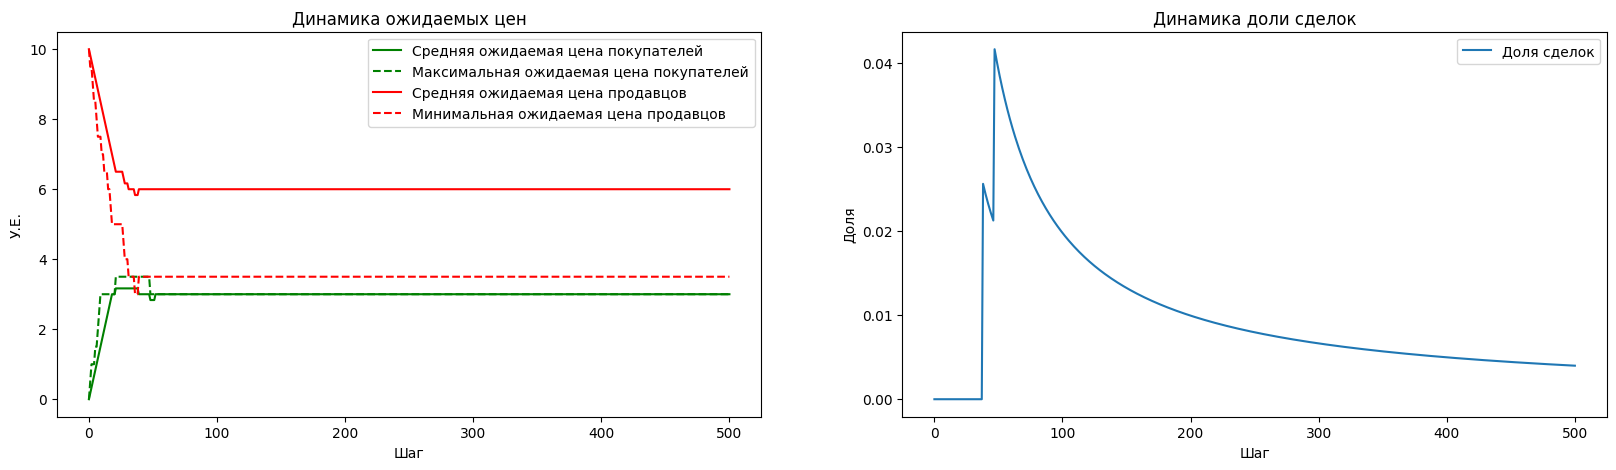

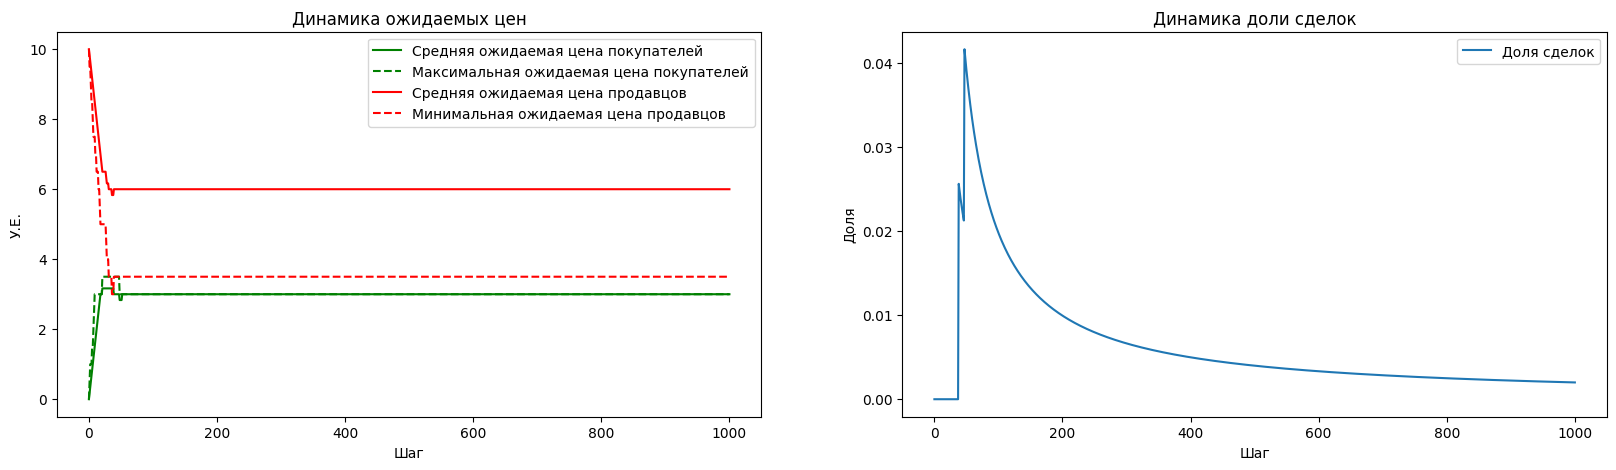

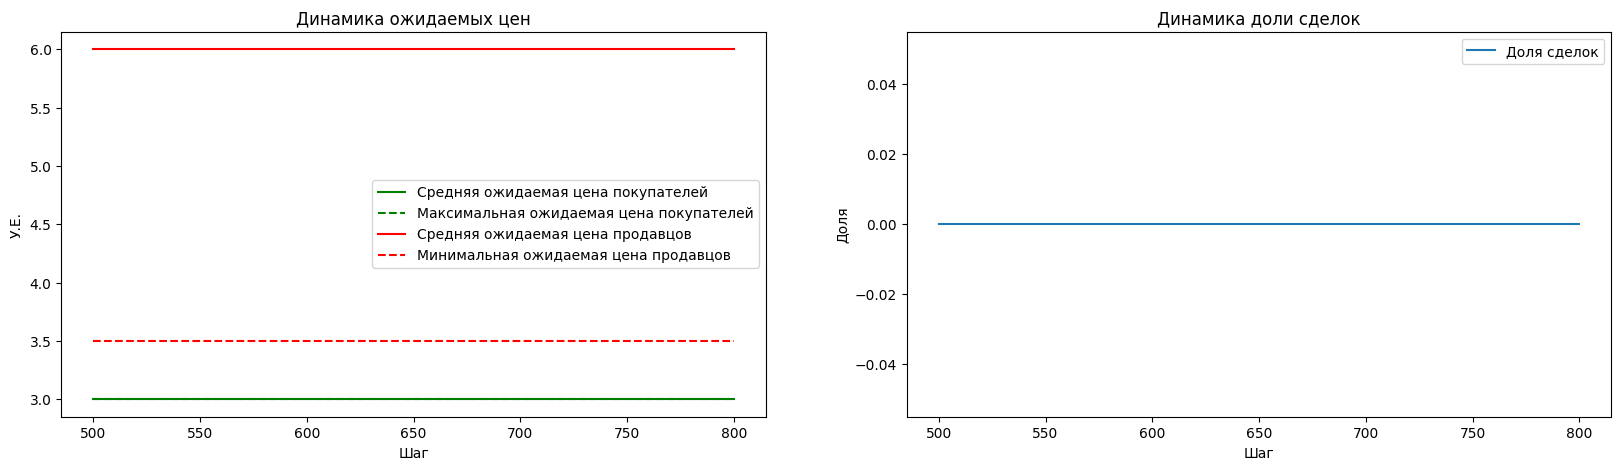

In [ ]:
model.plot_dynamics2(0, 500)
model.plot_dynamics2(0, 1000)
model.plot_dynamics2(500, 800)

Основное отличие нашей новой модели от предыдущей в том, что теперь в самом начале, продавцы и покупатели готовы понижать и повышать цены соответственно, так как это ситуации, когда на рынке нет еще удачных сделок. Потом в дальнейшем, когда на рынке появляются удачные сделки, в последующих неудачных агенты не хотят менять свои цены, потому что они ориентируются на прошлое, и им кажется, что им просто сейчас не везет. Получается ситуация, что при удачных сделках агенты с радостью меняют свои цены, которые содействуют расходу агентов друг от друга, что приводит к отсутвию удачных сделок в будущем, а как раз уже при неудачных сделках они не хотят менять свои цены. Мне кажется, этот случай показывает такой изъян рынка, когда у агентов есть определенная неполноценная информация о рынке (в нашем случаи это цены в прошлом периоде), на которую ориентируются агенты рынка, но она как раз нарушает равновесие.

## Задание 3 (3 балла)

Предположим, что теперь мы рассматриваем последовательные дни, и контакты продавцов и покупателей происходят в течение дня. Количество контактов между продавцами и покупателями в день ограничено константой max_connections, и не меняется в процессе моделирования.

Выделим локальные (внутридневные) параметры, которые меняются и учитываются в течение одного дня. Но на следующий день сбрасываются до исходных значений.

Модифицируйте базовую модель одним из указанных ниже вариантов.

<b><font color="red">!</font> Номер Вашего варианта указан в <a href="https://docs.google.com/spreadsheets/d/1jWBLQ1bJG2t2Ci38r1xFrKP06VjFn-IyKQO4PIEvXTA/edit#gid=0">таблице</a>.</b>

1. Локальные параметры: количество сделок агента. Не может быть более одной сделки.
2. Локальные параметры: у каждого продавца свое фиксированное количество товара, которое он может продать в один день. В конце для излишки сгорают.
3. Локальные параметры: у каждого покупателя свое фиксированное количество товара, которое он может купить в один день.
4. Локальные параметры: у каждого продавца случайное количество товара, которое он может продать в один день. В конце для излишки сгорают.
5. Локальные параметры: у каждого покупателя случайное количество товара, которое он может купить в один день.

* Продемонстрируйте и опишите работу модифицированной модели.
* Проинтерпретируйте результаты работы модели.


1.   Создадим модель 3
2.   Введем новый параметр в модель: max_connection - количество сделок в день
3.   У покупателя появится новый параметр случайное количество товаров(goods)
4.   Создадим список self.list_of_cos, который заполним номерами всех покупателей
5.   Создадим список self.list_am_goods, который заполним количеством товаров каждого покупателя на один день, на месте i self.consumers[i].goods(пункт 3)
6.  Изменения в функции deal


*   Если сделка состоялась, уменьшаем количество товаров у продавца под индексом consumer_id на один
7.  Изменения функции run


*   Теперь функция зависит от дней(задается параметр num_days), проходимся циклом по дням
*  Создаем цикл в цикле, проходимся по всем сделка в один день
*  Теперь проверяем не закончились ли товары, которые покупатель хотел купить, если закончились, то мы удаляем его из списка self.list_of_cos
*  Проверяем, есть ли покупатели, которые хотят что-то купить
*  Выбираем индекс покупателя случайным образом из списка self.list_of_cos
*  Возобновляем количество товаров, которые покупатели хотят купить, так как наступил новый день
*  Анологично восстонавливаем список индексов покупателей
8. В процессе работы печатаем некоторые переменные, чтобы работа модели была более понятной






In [ ]:
def mean(lst):
    return sum(lst)/len(lst)


class Model3:
    def __init__(self, max_connection, num_of_consumers, num_of_sellers, consumer_min, consumer_max, consumer_delta, seller_min, seller_max, seller_delta):

        #Введем новый параметр в модель: max_connection - количество сделок в день
        self.max_connection = max_connection
        self.num_of_consumers = num_of_consumers
        self.num_of_sellers = num_of_sellers

        # Список всех продавцов модели
        self.consumers = [Consumer(consumer_min, consumer_max, consumer_delta) for _ in range(num_of_consumers)]

        # Список всех покупателей модели
        self.sellers = [Seller(seller_min, seller_max, seller_delta) for _ in range(num_of_sellers)]

        # Список списков. На позиции i находится список текущих значений expect_price для всех покупателей на шаге i.
        self.consumers_expect_price = []

        # Список списков. На позиции i находится список текущих значений expect_price для всех продавцов на шаге i.
        self.sellers_expect_price = []

        # Список результатов сделок. На позиции i находится словарь вида
        # {
        #     'consumer_id' : consumer_id,
        #     'seller_id' : seller_id
        #     'result' : result
        # }
        # где result = 1, если на i шаге была успешная сделка, иначе 0.
        self.deals_results = []
        #Создадим список self.list_am_goods, который заполним количеством товаров каждого покупателя на один день

        self.list_am_goods = [0 for i in range(self.num_of_consumers)]
        for i in range(self.num_of_consumers):
          self.list_am_goods[i] = self.consumers[i].goods
        #Создадим список self.list_of_cos, который заполним номерами всех покупателей
        self.list_of_cos = [i for i in range(self.num_of_consumers)]
        self.cos_gr = [[] for i in range(self.max_connection)]

    def deal(self, consumer_id, seller_id):


        # Сохраняем текущие значения expect_price покупателей
        self.consumers_expect_price.append([consumer.expect_price for consumer in self.consumers])

        # Сохраняем текущие значения expect_price продавцов
        self.sellers_expect_price.append([seller.expect_price for seller in self.sellers])

        if self.sellers[seller_id].expect_price <= self.consumers[consumer_id].expect_price:
            # Сделка состоялась
            print('yes')
            print(consumer_id, self.list_am_goods[consumer_id])
            # Записываем факт состоявшейся сделки
            self.deals_results.append({
                'consumer_id' : consumer_id,
                'seller_id' : seller_id,
                'result' : 1
                })

            # Данный покупатель решает уменьшить у себя expect_price
            self.consumers[consumer_id].decrease_expect_price()

            # Данный продавец решает увеличить у себя expect_price
            self.sellers[seller_id].increase_expect_price()

            self.list_am_goods[consumer_id] -= 1


        else:
            # Сделка не состоялась
            print('no')
            # Записываем факт несостоявшейся сделки
            self.deals_results.append({
                'consumer_id' : consumer_id,
                'seller_id' : seller_id,
                'result' : 0
                })

            # Данный покупатель решает увеличить у себя expect_price
            self.sellers[seller_id].decrease_expect_price()

            # Данный продавец решает уменьшить у себя expect_price
            self.consumers[consumer_id].increase_expect_price()


    def run(self, num_days):
      # Проходимся по дням
      for i in range(1,num_days+1):
        if len(self.list_of_cos) != 0:
          #Теперь проходимся по сделкам в один день
          for j in range(1,self.max_connection+1):
        # Теперь проверяем не закончились ли товары, которые покупатель хотел купить, если закончились, то мы удаляем его из списка self.list_of_cos
            for k in range(self.num_of_consumers):
              if self.list_am_goods[k] == 0:
                self.list_of_cos.remove(k)
                self.list_am_goods[k] = -1
                #Проверяем, есть ли покупатели, которые хотят что-то купить
              if len(self.list_of_cos) != 0:
                # Выбираем индекс покупателя случайным образом из списка self.list_of_cos
                consumer_id = random.choice(self.list_of_cos)

              # Выбираем индекс продавца случайным образом
                seller_id = random.randrange(0, self.num_of_sellers)

              # Моделируем сделку
            self.deal(consumer_id, seller_id)
          #Возобновляем количество товаров, которые покупатели хотят купить, так как наступил новый день
          self.list_am_goods = [0 for i in range(self.num_of_consumers)]
          for i in range(self.num_of_consumers):
            self.list_am_goods[i] = self.consumers[i].goods
          #Анологично восстонавливаем список индексов покупателей
          self.list_of_cos = [i for i in range(self.num_of_consumers)]


    def plot_dynamics3(self, start, end):
        '''
            Визуализация динамики модели на шагах от start до end включительно
        '''

        # Формируем два графика по горизонтали
        fig = plt.figure(figsize = (20,5))
        ax1 = fig.add_subplot(1,2,1)
        ax2 = fig.add_subplot(1,2,2)

        # Список точек по оси шагов
        steps_range = list(range(start, end+1))
        ax1.title.set_text("Динамика ожидаемых цен")

        # Среднее значение expect_price среди покупателей
        ax1.plot(steps_range, list(map(mean, self.consumers_expect_price[start : end+1])), color='g', label = "Средняя ожидаемая цена покупателей")

        # Максимальное значение expect_price среди покупателей
        ax1.plot(steps_range, list(map(max, self.consumers_expect_price[start : end+1])), color='g', linestyle='--', label = "Максимальная ожидаемая цена покупателей")

        # Среднее значение expect_price среди продавцов
        ax1.plot(steps_range, list(map(mean, self.sellers_expect_price[start : end+1])), color='r', label = "Средняя ожидаемая цена продавцов")

        # Минимальное значение expect_price среди продавцов
        ax1.plot(steps_range, list(map(min, self.sellers_expect_price[start : end+1])), color='r', linestyle='--', label = "Минимальная ожидаемая цена продавцов")
        ax1.legend()
        ax1.set_xlabel("Шаг")
        ax1.set_ylabel("У.Е.")


        # Находим долю успешных сделок на отрезке от start до end включительно
        deals_sum = [0]
        for i in range(start, end+1):
            deals_sum.append(deals_sum[-1] + self.deals_results[i]['result'])
        deals_fraction = [deals_sum[i] / i for i in range(1, end - start + 2)]
        ax2.title.set_text("Динамика доли сделок")
        ax2.plot(steps_range, deals_fraction, label="Доля сделок")
        ax2.legend()
        ax2.set_xlabel("Шаг")
        ax2.set_ylabel("Доля")

    def plot_supply_and_demand3(self, pos_list):
        '''
            Визуализация спроса и предложения в моменты времени, указанные в списке pos_list
        '''

        # Формируем фигуру, состоящую из len(pos) графиков, расположенных горизонтально
        fig, axs = plt.subplots(1, len(pos_list), figsize = (5 * len(pos_list), 5))


        for i in range(len(pos_list)):
            # Для каждого значения из pos рисуем свой график
            axs[i].title.set_text(f"Спрос и предложение в момент {pos_list[i]}")

            # Все значения expect_price для покупателей в момент времени pos[i] сортируем по убыванию.
            # Этот график описывает функцию спроса, т.е. при заданном значении цены мы видим, какое количество покупателей готовы купить товар за данную цену или дороже
            axs[i].plot(list(range(1, self.num_of_consumers+1)), sorted(self.consumers_expect_price[pos_list[i]], reverse=True), color='g', label="Спрос")

            # Все значения expect_price для продавцов в момент времени pos[i] сортируем по возрастанию.
            # Этот график описывает функцию предложения, т.е. при заданном значении цены мы видим, какое количество продавцов готовы продать товар за данную цену или дешевле
            axs[i].plot(list(range(1, self.num_of_sellers+1)), sorted(self.sellers_expect_price[pos_list[i]]), color='r', label="Предложение")

            axs[i].legend()
            axs[i].set_xlabel("Количество")
            axs[i].set_ylabel("У.Е.")

    def plot_graph3(self, start, end):
        '''
            Построение и визуализация графа удачных и неудачных сделок
            на отрезке времени от start до end.
        '''
        # Словарь для построения графа сделок.
        # Ключ -- пара (consumer_id, seller_id)
        # Значение -- словарь с ключами 'positive_count' и 'negative_count',
        # в которых будут подсчитано количество удачных и неудачных сделок
        # между consumer_id и seller_id в интервале от start до end
        g_deals = {}

        # Создание всех ключей в g_deals и инициирование нулевыми значениями
        for consumer_id in range(self.num_of_consumers):
            for seller_id in range(self.num_of_sellers):
                g_deals[(consumer_id, seller_id)] = {
                    'positive_count' : 0,
                    'negative_count' : 0,
                }

        # Для всех моментов времени от start до end
        for i in range(start, end+1):


            if self.deals_results[i]['result'] == 0: #Если сделка неудачная
                # то увеличиваем счетчик неудачных сделок для данной пары consumer_id и seller_id
                g_deals[self.deals_results[i]['consumer_id'], self.deals_results[i]['seller_id']]['negative_count'] += 1
            else:
                g_deals[self.deals_results[i]['consumer_id'], self.deals_results[i]['seller_id']]['positive_count'] += 1

        max_value = 0
        for edge, value in g_deals.items():
            max_value = max(max_value, value['negative_count'], value['positive_count'])

        graph = graphviz.Graph()
        for consumer_id in range(self.num_of_consumers):
            graph.node(f"С {consumer_id}", label=str(consumer_id), style='filled', fillcolor='blue')

        for seller_id in range(self.num_of_sellers):
            graph.node(f"S {seller_id}", label=str(seller_id), style='filled', fillcolor='magenta', shape='box')

        def get_penwidth(x):
            return str(10*x // max_value)

        for edge, value in g_deals.items():
            graph.edge(f"С {edge[0]}", f"S {edge[1]}", penwidth = get_penwidth(value['negative_count']), color="red")
            graph.edge(f"С {edge[0]}", f"S {edge[1]}", penwidth =  get_penwidth(value['positive_count']), color="green")

        graph.attr(layout="circo")
        return graph





class Consumer:
    def __init__(self, consumer_min, consumer_max, consumer_delta):
        self.max_price = consumer_min + random.random()*(consumer_max - consumer_min)
        self.expect_price = 0
        self.delta = consumer_delta
        # новый параметр - количество товаров в день
        self.goods = random.randrange(1,10)

    def increase_expect_price(self):
        if self.expect_price + self.delta <= self.max_price:
            self.expect_price += self.delta

    def decrease_expect_price(self):
        self.expect_price -= self.delta



class Seller:
    def __init__(self, seller_min, seller_max, seller_delta):
        self.min_price = seller_min + random.random()*(seller_max - seller_min)
        self.expect_price = seller_max
        self.delta = seller_delta

    def increase_expect_price(self):
        self.expect_price += self.delta

    def decrease_expect_price(self):
        if self.expect_price - self.delta >= self.min_price:
            self.expect_price -= self.delta


In [ ]:
random.seed(42)
model = Model3(max_connection = 20,
              num_of_consumers=3,
              num_of_sellers=3,
              consumer_min=3,
              consumer_max=4,
              consumer_delta=0.1,
              seller_min=0,
              seller_max=1,
              seller_delta=0.1)

model.run(1000)


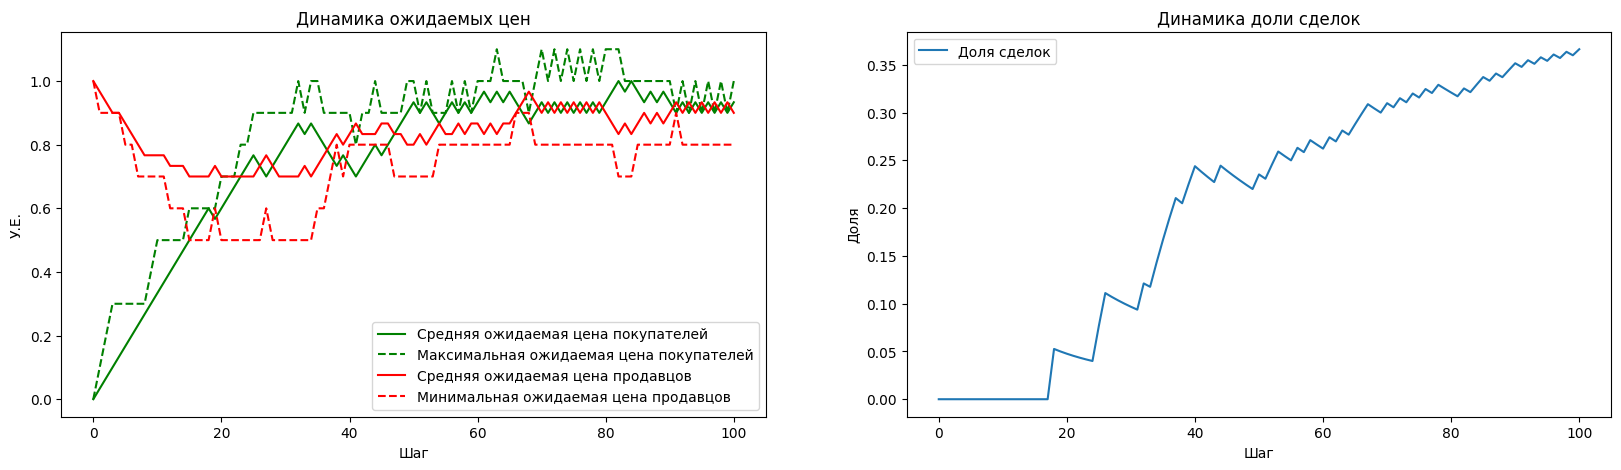

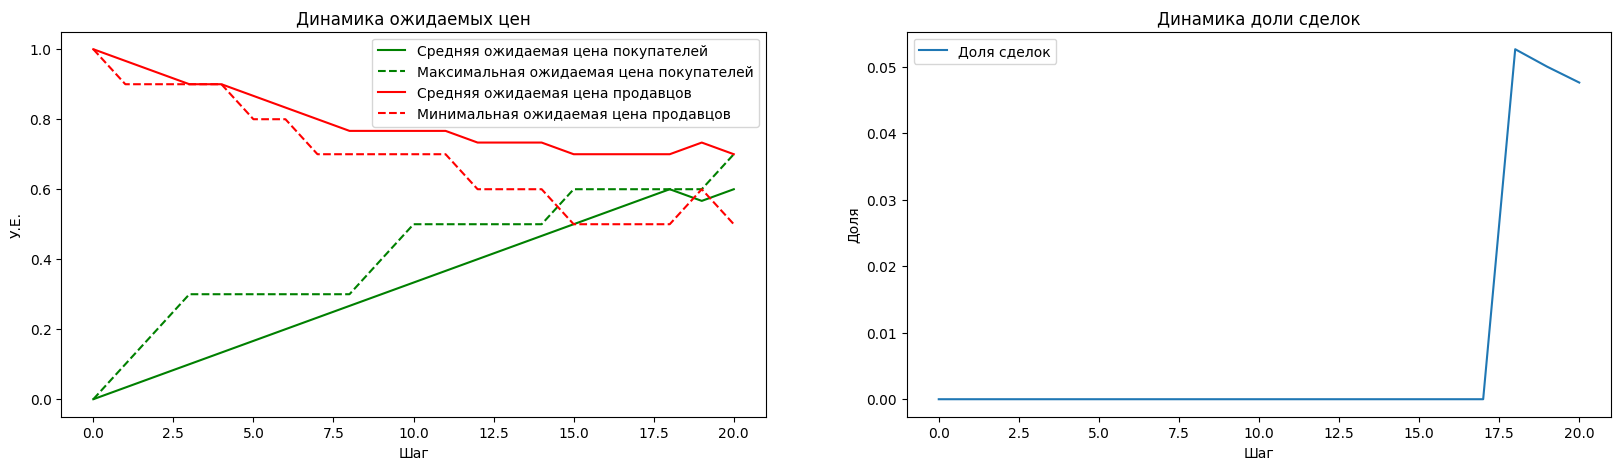

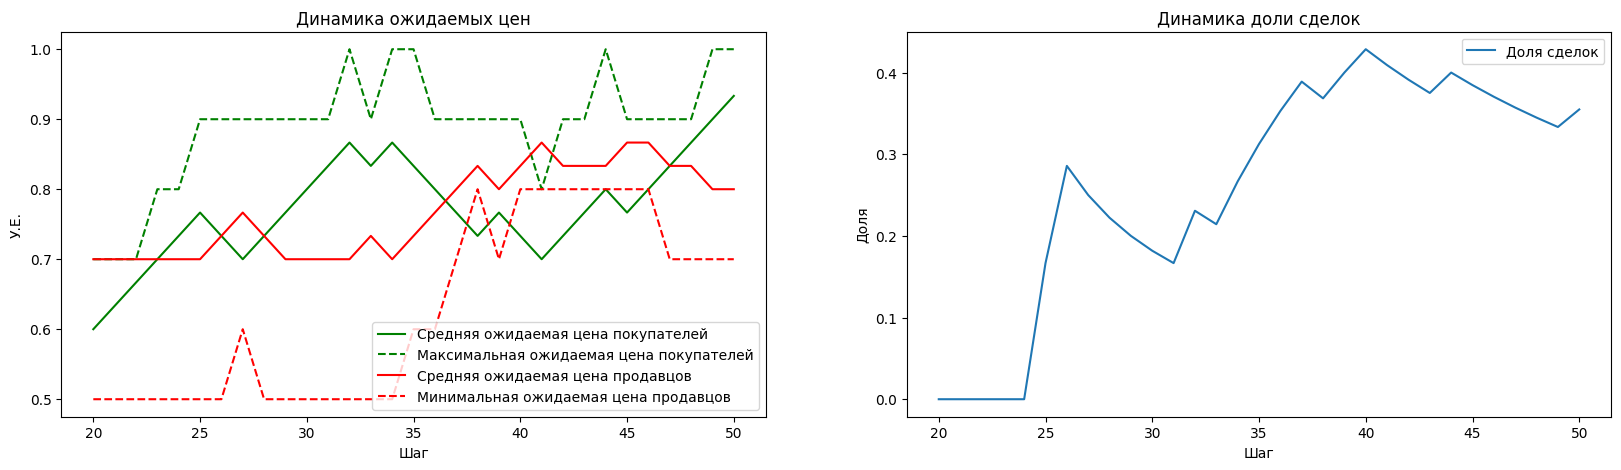

In [ ]:
model.plot_dynamics3(0, 100)
model.plot_dynamics3(0, 20)
model.plot_dynamics3(20, 50)

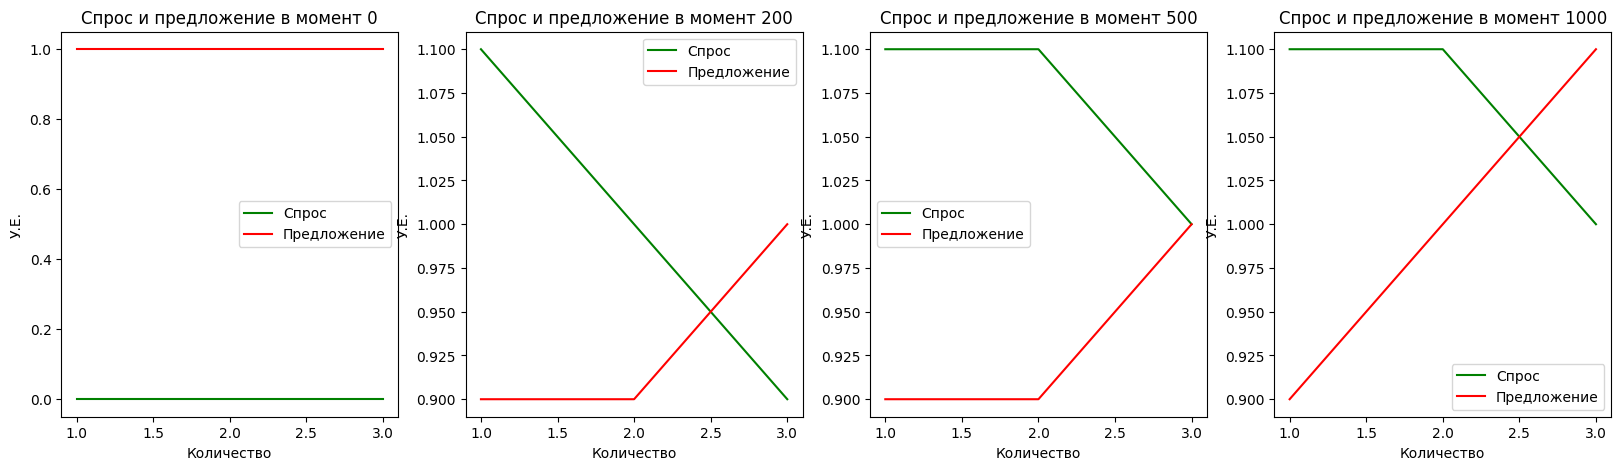

In [ ]:
model.plot_supply_and_demand3([0, 200, 500, 1000])

Основной особенностью этой модели, на мой взгляд, является то, что шаги у нас деляется на отдельные группы(разные дни), поэтому сильно заметен ступенчатый вид максимальных и минимальных ожидаемых цен. Более того, это ведет к тому, что график доли сделок растет скочками. В целом эта модель похожа на базовую. Есть значительное увеличение количесвтва удачных сделок засчет установки определенного количества сделок за каждый день. Также здесь можно заметить не такой активный рост доли сделок, как в базовой можели, так как некоторые потребители уходят с рынка из-за того, что уже купили достаточно товара. По моему мнению, это модель больше похожа на реальность, так как потребителю не нужно бесконечно много товаров, а какое-то случайное количество в день, следовательно, мы рассматриваем ограниченный спрос в диапозоне одного дня.  


## Задание 4 (4 балла)


Придумайте свою модификацию модели, в которой отражены другие черты реальных рынков.

<b><font color="red">!</font> Перед выполнением задания необходимо <a href="https://docs.google.com/forms/d/e/1FAIpQLSdYmodGU144W_1L45tfIGmGpK9_0yRlVp7XeSG4yKfUGCkMTg/viewform">согласовать</a> Вашу идею с преподавателем. Ваше предложение не должно совпадать с предыдущими модификациями или модификациями других студентов.
Все согласованные предложения от студентов будут отображаться в <a href="https://docs.google.com/spreadsheets/d/1enXCHHBGYJA1iAUvuDj7TYCyBIHjX3rtZ5D4FIXnbZ8/edit?usp=sharing">таблице</a>.</b>

* Продемонстрируйте и опишите работу модифицированной модели.
* По возможности сделайте ее визуализацию.
* Проинтерпретируйте результаты работы модели.

Изменением модели является появление фирмы-price-maker. Одна фирма (пусть это будет фирма номер один, так как у нас всегда есть хотя бы одна фирма на рынке), является price-maker (может устанавливать рыночную цену), остальные являются price- takers. До того, как фирма-price-maker выйдет на рынок (совершит сделку), на рынке остаются те же правила, как и в базовой модели. Когда фирма-price-maker совершает свою первую сделку, она устанавливает цену на уровне своей monopoly price (определяется для фирмы 1 в начале процесса моделирование как случайное число на отрезке [saller_min, saller_max]). В дальнейшем цена будет на этом уровне для всех фирм. Сделка будет удачной, если self.sellers[seller_id].expect_price примерно равна monopoly price(создадим функцию для сравнения, где будем считать равны ли цены с определенной погрешностью) и consumers[consumer_id].expect_price выше или равна monopoly price, иначе сделка считается неудачной. В дальнейшем фирмы будут покидать рынок, если у них будет две неудачные сделки, фирма-price-maker остаётся на рынке при любых условиях.



1.   Создаем модель 4
2.   Создаем переменную self.delta, которая теперь хранит дельту продавцов
3.   Создаем переменную self.monopoly_price (определяется для фирмы 1 в начале процесса моделирование как случайное число на отрезке [saller_min, saller_max])
4.   Создаем список всех продавцов(их номера) self.list_of_sel
5.   Создадим список списоков, где будем хранить нули за каждую неудачную продаца self.fails. Список под индексом i - нули за каждую неудачную сделку продавца seller_id
6.  Создадим переменную (self.flag), которая обозначает присутствие фирмы price-maker на рынке, в самом начале False, потом, когда фирма price-maker выйдет на рынок, сделаем True
7.  Создадим функцию comp, которая будет сравнивать монопольную цену и цену продавца(разница должна быть меньше дельты продавцов)
8. Изменения в функции deal

*   При условии, что фирма price-maker не зашла на рынок, соблюдаются правила базовой модели.
*   При условии, что фирма price-maker зашла на рынок, сделка считается удачной, если выполняется условие self.sellers[seller_id].expect_price примерно равна monopoly price(пункт 7) и consumers[consumer_id].expect_price выше или равна monopoly price, выполняются те же изменения цен, как и в базовой модели. При условии неудачной сделки, записываем ноль в список под индесом seller_id, так как считаем, что эта фирма не может работать при новых условиях, и она уходит с рынка, когда два раза не сможет поучаствовать в удачной сделке

9.  Изменения функции run


*   На каждый шаг проверяем наличие двух нулей у seller_id, если есть, то удаляем из списка self.list_of_sel
*   Далее случайно выбираем продавца из списка self.list_of_sel
*   Если seller_id оказался нулем, следовательно, на рынок зашла фирма price-maker, меняем falg на True


Будем распечатывать некоторые переменные, чтобы было более наглядно, что происходит на рынке, так как графики не будут показывать полноценной картины




In [ ]:
def mean(lst):
    return sum(lst)/len(lst)

class Model4:
    def __init__(self, num_of_consumers, num_of_sellers, consumer_min, consumer_max, consumer_delta, seller_min, seller_max, seller_delta):

        self.num_of_consumers = num_of_consumers
        self.num_of_sellers = num_of_sellers

        # Список всех продавцов модели
        self.consumers = [Consumer(consumer_min, consumer_max, consumer_delta) for _ in range(num_of_consumers)]

        # Список всех покупателей модели
        self.sellers = [Seller(seller_min, seller_max, seller_delta) for _ in range(num_of_sellers)]

        # Список списков. На позиции i находится список текущих значений expect_price для всех покупателей на шаге i.
        self.consumers_expect_price = []

        # Список списков. На позиции i находится список текущих значений expect_price для всех продавцов на шаге i.
        self.sellers_expect_price = []
        self.delta = seller_delta
        # Список результатов сделок. На позиции i находится словарь вида
        # {
        #     'consumer_id' : consumer_id,
        #     'seller_id' : seller_id
        #     'result' : result
        # }
        # где result = 1, если на i шаге была успешная сделка, иначе 0.
        self.deals_results = []

        # создадим monopoly price (определяется для фирмы 1 в начале процесса моделирование как случайное число на отрезке [saller_min, saller_max])
        self.monopoly_price = seller_min + random.uniform(0.7, 1)*(seller_max - seller_min) # возьмем случайное число на промежутке [0.7, 1], чтобы монопольная цена была больше, чем половина отрезка [saller_min, saller_max]
        print(self.monopoly_price)
        self.list_of_sel = [i for i in range(self.num_of_sellers)]
        print(self.list_of_sel)
        # создадим список списков, где для каждого продавца храним количество неудачных сделок(количесво нулей)
        self.fails = [[] for _ in range(num_of_sellers)]
        print(self.fails)
        self.am_sel = []
        self.flag = False # Создадим переменную, которая обозначает присутствие фирмы price-maker на рынке, в самом начале False, потом, когда фирма price-maker выйдет на рынок, сделаем True
    def comp1(self,sel_price, m_price):
      return  m_price - sel_price  < self.sellers[0].delta

    def deal(self, consumer_id, seller_id):



        # Сохраняем текущие значения expect_price покупателей
        self.consumers_expect_price.append([consumer.expect_price for consumer in self.consumers])

        # Сохраняем текущие значения expect_price продавцов
        self.sellers_expect_price.append([seller.expect_price for seller in self.sellers])

       # Дальше напишем, как будут проходить сделка
       # Первый случай фирма price-maker не вышла на рынок, тогда у нас остаются правила проведения сделки из базовой модели
        if  self.flag == False:
          if self.sellers[seller_id].expect_price <= self.consumers[consumer_id].expect_price :
              # Сделка состоялась
              print('yes')
              print(self.sellers[seller_id].expect_price, self.consumers[consumer_id].expect_price)
              # Записываем факт состоявшейся сделки
              self.deals_results.append({
                  'consumer_id' : consumer_id,
                  'seller_id' : seller_id,
                  'result' : 1
                  })

              # Данный покупатель решает уменьшить у себя expect_price
              self.consumers[consumer_id].decrease_expect_price()

              # Данный продавец решает увеличить у себя expect_price
              self.sellers[seller_id].increase_expect_price()

          elif self.sellers[seller_id].expect_price > self.consumers[consumer_id].expect_price:
              # Сделка не состоялась

              print('no')
              print(self.sellers[seller_id].expect_price, self.consumers[consumer_id].expect_price)


              # Записываем факт несостоявшейся сделки
              self.deals_results.append({
                  'consumer_id' : consumer_id,
                  'seller_id' : seller_id,
                  'result' : 0
                  })

              # Данный покупатель решает увеличить у себя expect_price
              self.sellers[seller_id].decrease_expect_price()
              # Данный продавец решает уменьшить у себя expect_price
              self.consumers[consumer_id].increase_expect_price()





        elif self.flag:

          # Случай, когда фирма price-maker вышла на рынок

          if seller_id in self.list_of_sel and self.comp1(self.sellers[seller_id].expect_price, self.monopoly_price) and self.consumers[consumer_id].expect_price >= self.monopoly_price:
            print('yes')
            print(self.sellers[seller_id].expect_price, self.consumers[consumer_id].expect_price)
          # Сделка удалась
           # Записываем факт состоявшейся сделки
            self.deals_results.append({
                'consumer_id' : consumer_id,
                'seller_id' : seller_id,
                'result' : 1
                })

              # Данный покупатель решает уменьшить у себя expect_price
            self.consumers[consumer_id].decrease_expect_price()

              # Данный продавец решает увеличить у себя expect_price
            self.sellers[seller_id].increase_expect_price()
          elif (self.comp1(self.sellers[seller_id].expect_price, self.monopoly_price) ==False or self.consumers[consumer_id].expect_price < self.monopoly_price):
                  # Сделка не состоялась
            print('no')
            print(self.sellers[seller_id].expect_price, self.consumers[consumer_id].expect_price)

            self.fails[seller_id].append(0)
            # Записываем факт несостоявшейся сделки
            self.deals_results.append({
                  'consumer_id' : consumer_id,
                  'seller_id' : seller_id,
                  'result' : 0
                  })

              # Данный покупатель решает увеличить у себя expect_price
            self.sellers[seller_id].decrease_expect_price()

              # Данный продавец решает уменьшить у себя expect_price
            self.consumers[consumer_id].increase_expect_price()


    def run(self, num_of_steps):

        for j in trange(num_of_steps+1): # trange вместо range для визуализации прогресс-бара
            for i in range(1,self.num_of_sellers):
              if self.fails[i].count(0) == 2:
                self.list_of_sel.remove(i)
                self.fails[i] =[]

            # Выбираем индекс покупателя случайным образом
            consumer_id = random.randrange(0, self.num_of_consumers)
            print(self.list_of_sel)
            self.am_sel.append(len(self.list_of_sel))
            # Выбираем индекс продавца случайным образом
            seller_id = random.choice(self.list_of_sel)
            if seller_id == 0:
              self.flag = True
            print(self.flag)
            # Моделируем сделку
            self.deal(consumer_id, seller_id)
            print(consumer_id, seller_id)
    def plot_dynamics4(self, start, end):
        '''
            Визуализация динамики модели на шагах от start до end включительно
        '''

        # Формируем два графика по горизонтали
        fig = plt.figure(figsize = (20,5))
        ax1 = fig.add_subplot(1,2,1)
        ax2 = fig.add_subplot(1,2,2)

        # Список точек по оси шагов
        steps_range = list(range(start, end+1))
        ax1.title.set_text("Динамика ожидаемых цен")

        # Среднее значение expect_price среди покупателей
        ax1.plot(steps_range, list(map(mean, self.consumers_expect_price[start : end+1])), color='g', label = "Средняя ожидаемая цена покупателей")

        # Максимальное значение expect_price среди покупателей
        ax1.plot(steps_range, list(map(max, self.consumers_expect_price[start : end+1])), color='g', linestyle='--', label = "Максимальная ожидаемая цена покупателей")

        # Среднее значение expect_price среди продавцов
        ax1.plot(steps_range, list(map(mean, self.sellers_expect_price[start : end+1])), color='r', label = "Средняя ожидаемая цена продавцов")

        # Минимальное значение expect_price среди продавцов
        ax1.plot(steps_range, list(map(min, self.sellers_expect_price[start : end+1])), color='r', linestyle='--', label = "Минимальная ожидаемая цена продавцов")
        ax1.legend()
        ax1.set_xlabel("Шаг")
        ax1.set_ylabel("У.Е.")


        # Находим долю успешных сделок на отрезке от start до end включительно
        deals_sum = [0]
        for i in range(start, end+1):
            deals_sum.append(deals_sum[-1] + self.deals_results[i]['result'])
        deals_fraction = [deals_sum[i] / i for i in range(1, end - start + 2)]
        ax2.title.set_text("Динамика доли сделок")
        ax2.plot(steps_range, deals_fraction, label="Доля сделок")
        ax2.legend()
        ax2.set_xlabel("Шаг")
        ax2.set_ylabel("Доля")


    def plot_supply_and_demand4(self, pos_list):
        '''
            Визуализация спроса и предложения в моменты времени, указанные в списке pos_list
        '''

        # Формируем фигуру, состоящую из len(pos) графиков, расположенных горизонтально
        fig, axs = plt.subplots(1, len(pos_list), figsize = (5 * len(pos_list), 5))


        for i in range(len(pos_list)):
            # Для каждого значения из pos рисуем свой график
            axs[i].title.set_text(f"Спрос и предложение в момент {pos_list[i]}")

            # Все значения expect_price для покупателей в момент времени pos[i] сортируем по убыванию.
            # Этот график описывает функцию спроса, т.е. при заданном значении цены мы видим, какое количество покупателей готовы купить товар за данную цену или дороже
            axs[i].plot(list(range(1, self.num_of_consumers+1)), sorted(self.consumers_expect_price[pos_list[i]], reverse=True), color='g', label="Спрос")

            # Все значения expect_price для продавцов в момент времени pos[i] сортируем по возрастанию.
            # Этот график описывает функцию предложения, т.е. при заданном значении цены мы видим, какое количество продавцов готовы продать товар за данную цену или дешевле
            axs[i].plot(list(range(1, self.num_of_sellers+1)), sorted(self.sellers_expect_price[pos_list[i]]), color='r', label="Предложение")
            axs[i].legend()
            axs[i].set_xlabel("Количество")
            axs[i].set_ylabel("У.Е.")
    def seler(self,start,end):
      steps_range = list(range(start, end+1))



      fig = plt.figure(figsize = (20,5))
      ax2 = fig.add_subplot(1,2,2)
      ax2.title.set_text("Динамика ухода фирм с рынке")
      ax2.plot(steps_range, self.am_sel[start:end+1], label="Уход фирм с рынка")
      ax2.legend()
      ax2.set_xlabel("Шаг")
      ax2.set_ylabel("Количество")



class Consumer:
    def __init__(self, consumer_min, consumer_max, consumer_delta):
        self.max_price = consumer_min + random.random()*(consumer_max - consumer_min)
        self.expect_price = 0
        self.delta = consumer_delta


    def increase_expect_price(self):
        if self.expect_price + self.delta <= self.max_price:
            self.expect_price += self.delta

    def decrease_expect_price(self):
        self.expect_price -= self.delta


class Seller:
    def __init__(self, seller_min, seller_max, seller_delta):
        self.min_price = seller_min + random.random()*(seller_max - seller_min)
        self.expect_price = seller_max
        self.delta = seller_delta


    def increase_expect_price(self):
        self.expect_price += self.delta

    def decrease_expect_price(self):
        if self.expect_price - self.delta >= self.min_price:
            self.expect_price -= self.delta

In [ ]:
random.seed(42)
model = Model4(num_of_consumers=3,
              num_of_sellers=3,
              consumer_min=3,
              consumer_max=4,
              consumer_delta=0.1,
              seller_min=0,
              seller_max=1,
              seller_delta=0.1)
model.run(1000)

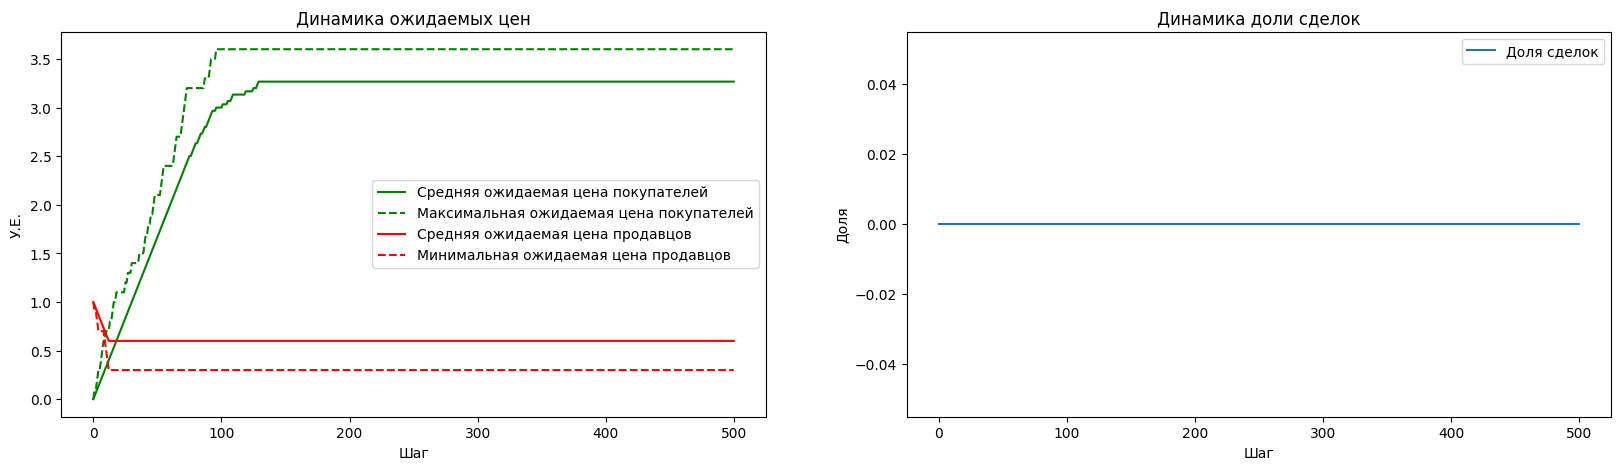

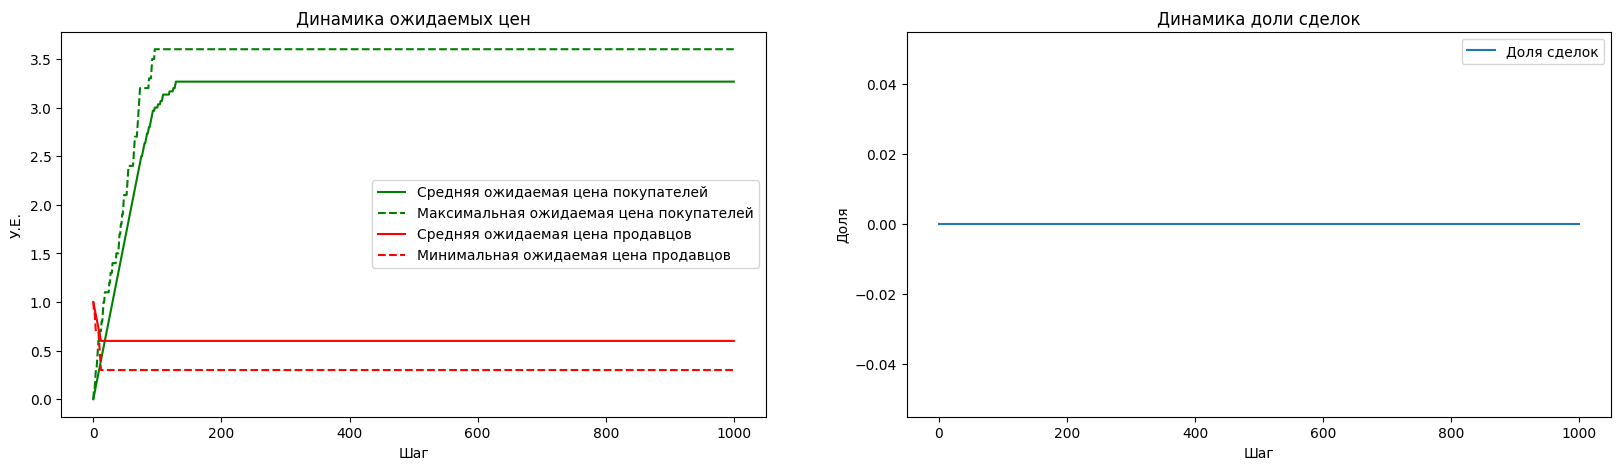

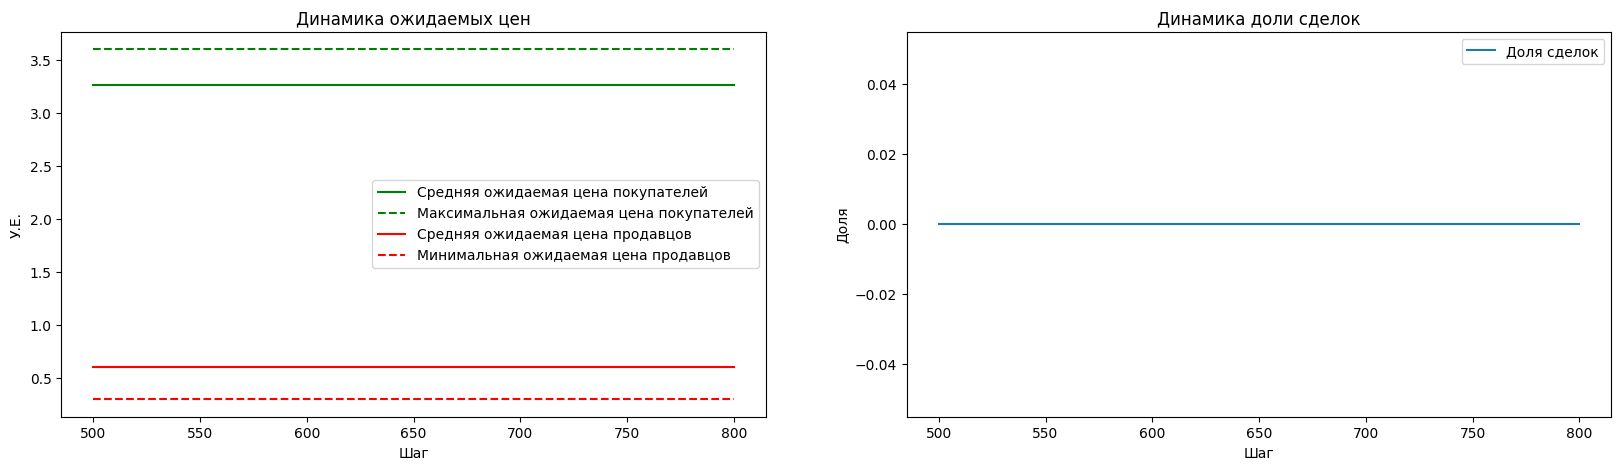

In [ ]:
model.plot_dynamics4(0, 500)
model.plot_dynamics4(0, 1000)
model.plot_dynamics4(500, 800)

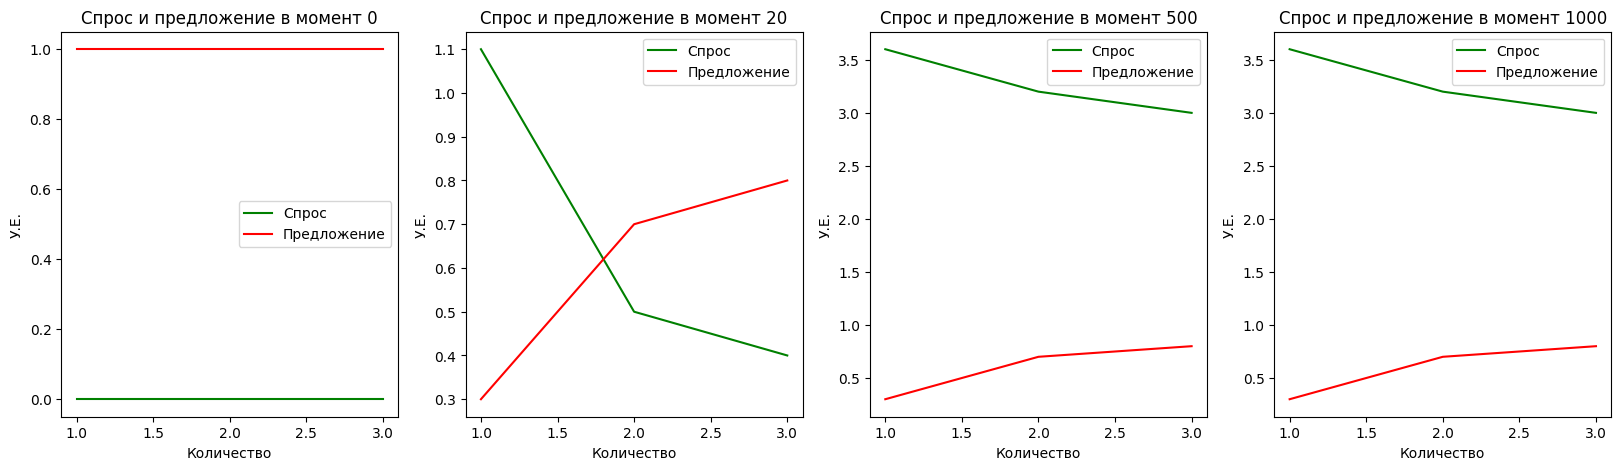

In [ ]:
model.plot_supply_and_demand4([0, 20, 500, 1000])

К сожалению, в данном виде этой задачи нам не много могут дать графики, так как появления фирмы price-maker на рынке - это случайное событие, не знаем, когда именно она совершит первую сделку. Вот, напрмер, выше представлен, случай, когда фирма price-maker почти сразу вышла на рынок, и остальные фирмы не успели увеличить свою цену до монопольной, поэтому они вскоре все будут покидать рынок, так как в нашем примере фирм много, и мала вероятность, что фирма сможет достичь монопольной цены и совершить удачную сделку. Также видно, что на графике есть пересечение цен, но при этом данный факт нам не дает удачную сделку, так как теперь это больше монопольнаый рынок, и продавцы должны ориентироваться на монольную цену, а не на спрос. Опять же это еще один дефект рынка (появление компании, которая контролирует цену)

Как мне кажется, в этой ситуцации интересно будет наблюдать, как компании покидают рынок, для этого создадим отлельную финкцию, которая строит график, количества фирм на рынке в зависимости от шага

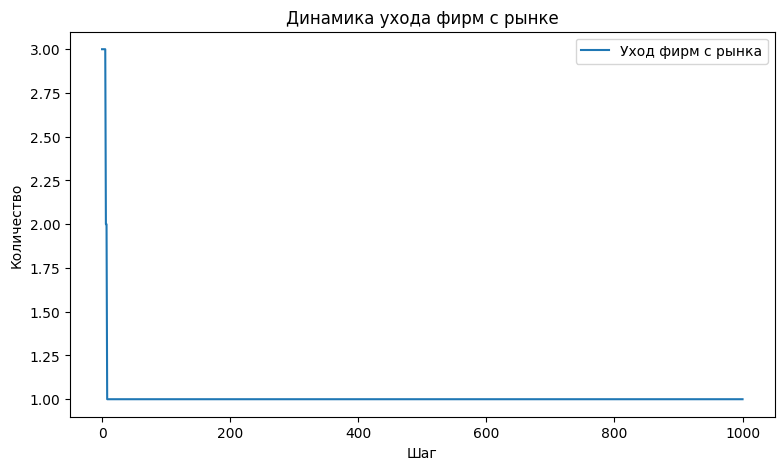

In [ ]:
model.seler(0,1000)

В первом случае, когда фирма price-maker почти сразу зашла на рынок, остальные фирмы резко с него ушли, так как не смогли соответствовать монопольным условиям(что похоже на реальную ситуаци при появлении на рынке монополии)

Рассмотрим случай с меньшим количесвом фирм и шагов

In [ ]:
random.seed(42)
model = Model4(num_of_consumers=3,
              num_of_sellers=3,
              consumer_min=3,
              consumer_max=4,
              consumer_delta=0.1,
              seller_min=0,
              seller_max=1,
              seller_delta=0.1)
model.run(10)

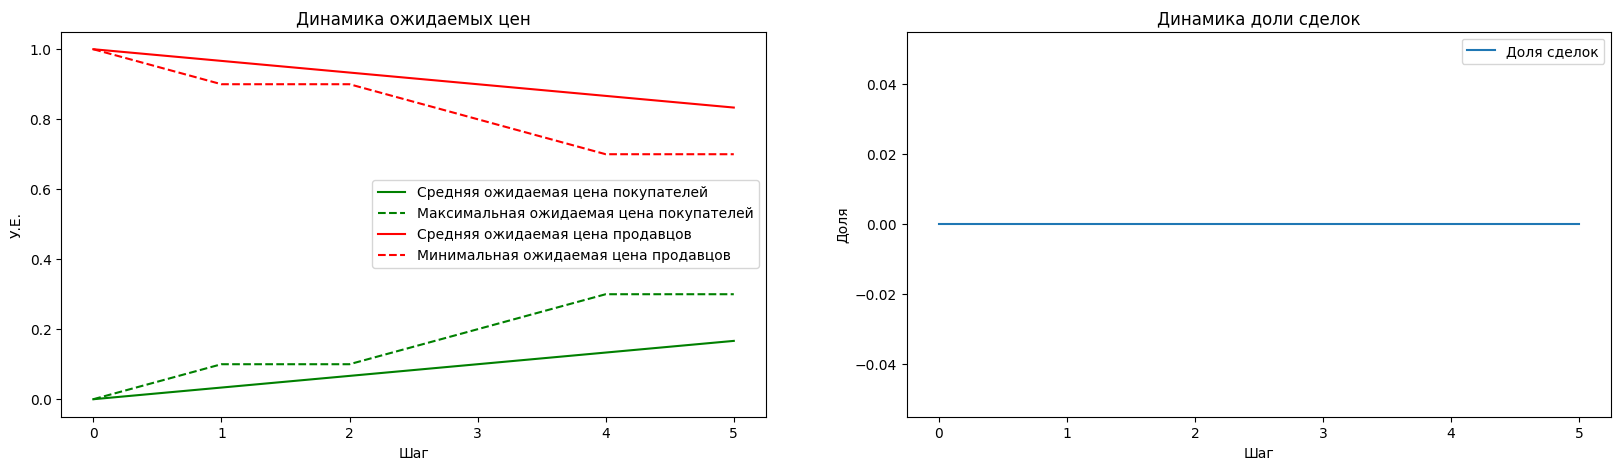

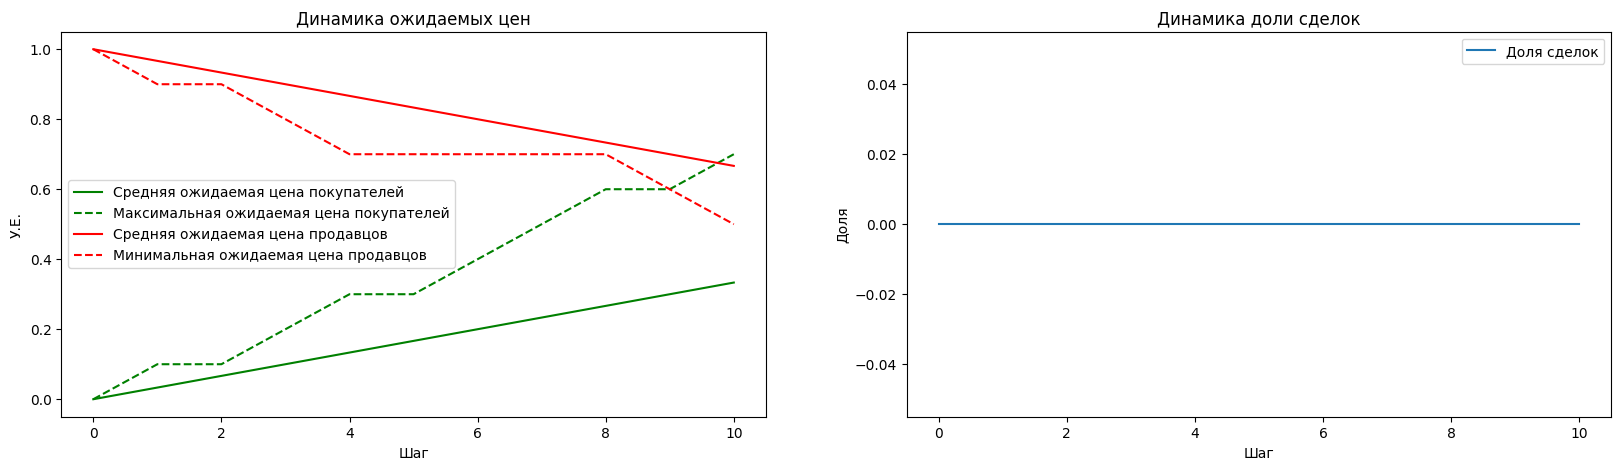

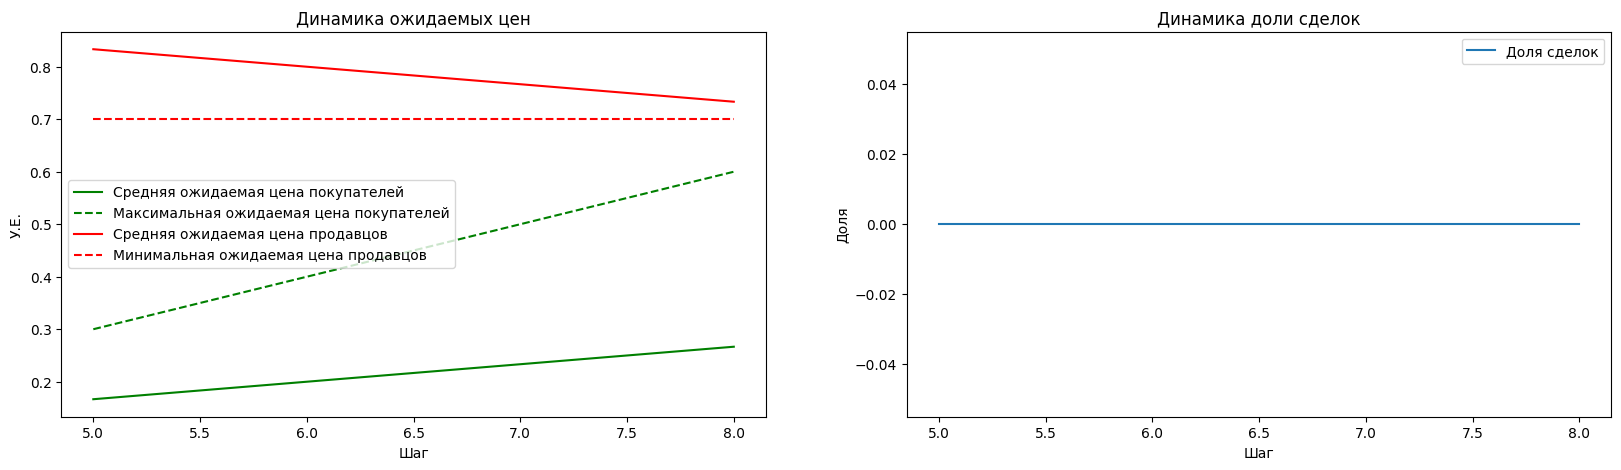

In [ ]:
model.plot_dynamics4(0, 5)
model.plot_dynamics4(0, 10)
model.plot_dynamics4(5, 8)

Опять же здесь не было удачных сделок, но здесь можно более наглядно увидеть, как фирмы уходят с рынка

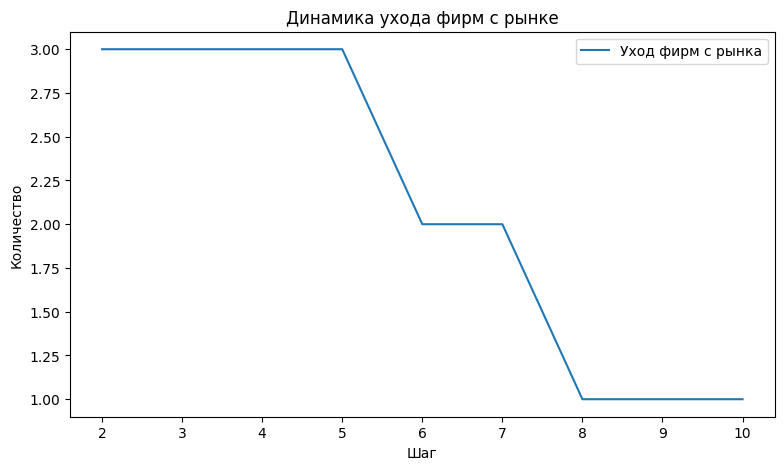

In [ ]:
model.seler(2,10)

In [ ]:
random.seed(42)
model = Model4(num_of_consumers=50,
              num_of_sellers=50,
              consumer_min=3,
              consumer_max=4,
              consumer_delta=0.5,
              seller_min=0,
              seller_max=1,
              seller_delta=0.5)
model.run(1000)

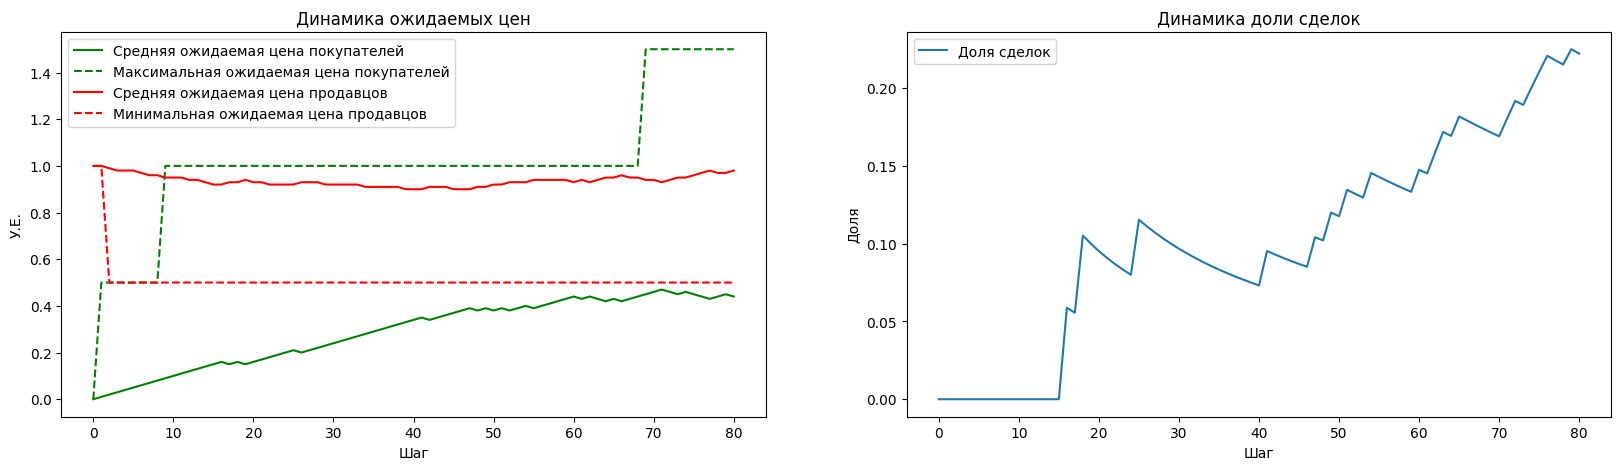

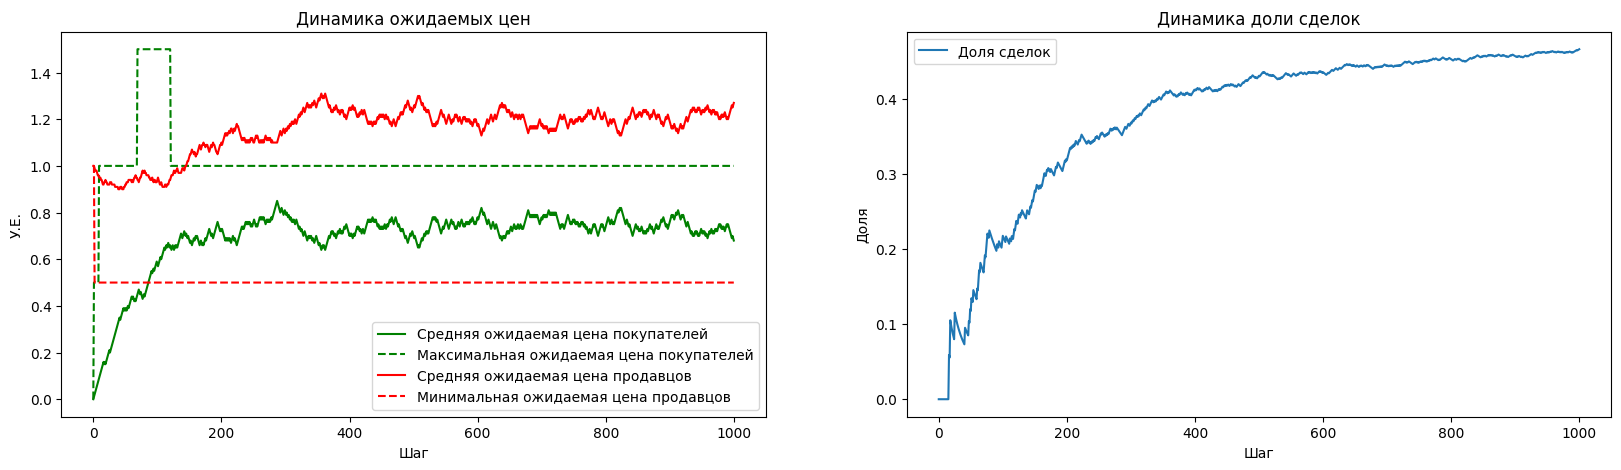

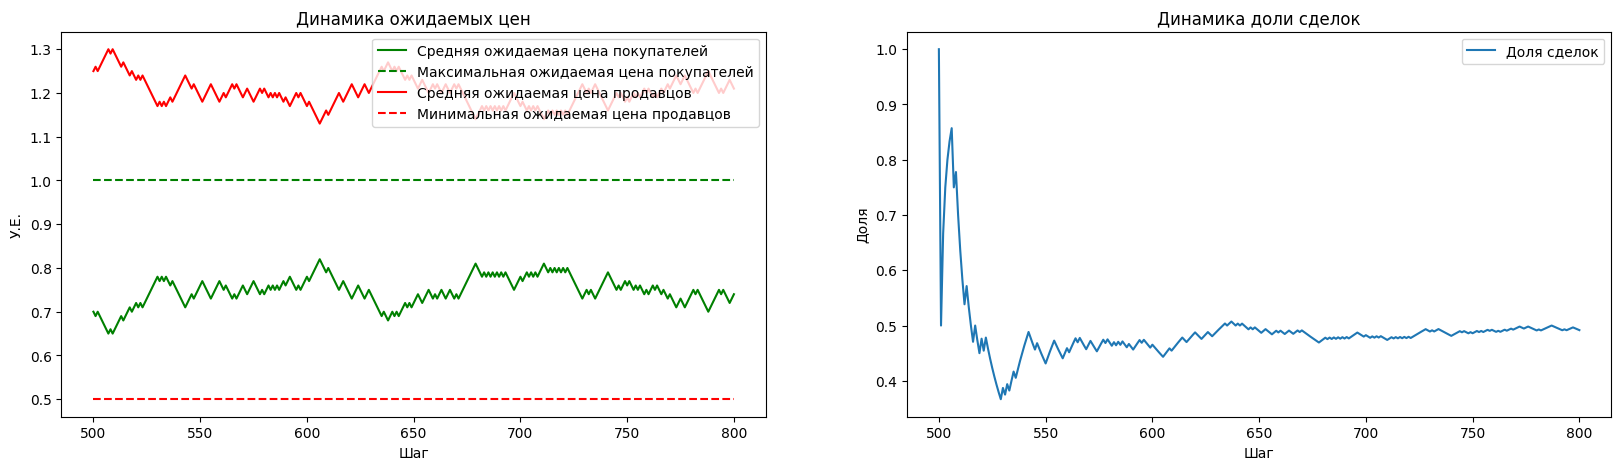

In [ ]:
model.plot_dynamics4(0, 80)
model.plot_dynamics4(0, 1000)
model.plot_dynamics4(500, 800)

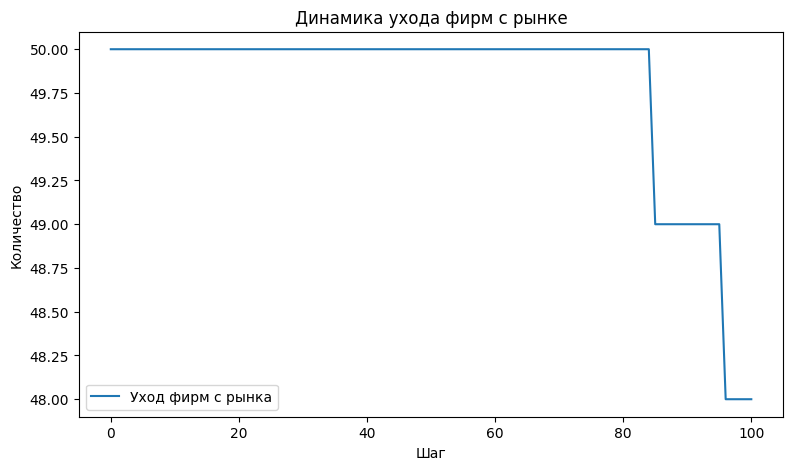

In [ ]:
model.seler(0,100)

Если же теперь рассматривать рынок с большим количеством продавцов(вероятность, что фирма price-maker выйдет на рынок быстро ниже) и большой дельтой для продавцов(больше вероятность цене продавца быть примерно равной монопольной цене), графики становятся уже более приближенными к базовой модели(больше похоже на совершенную конкуренции,чем на монопольный рынок)

Итоговый вывод:
нельзя однозначно оценить ситуацию на рынке по графикам, которые использовались в более ранних моделях. Немного понятнее становится, блягодаря графику динамики ухода фирм с рынка и тому, что мы распечатываем некоторые параметры в процессе работы. Но однозначно можно сказать, что ситуция на рынке ухудшится при таких изменениях модели(количество удачных сделок уменьшится), что довольно ожидаемо, ведь в общем случае монополия вредит рынку.